<div class="alert alert-info">
    <strong>Ссылка на цикл с диаграммами чтобы долго не искать :)</strong> </div>

[Ссылка на цикл с даграммами чтобы долго не искать :)](#cell1)

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

#### Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении
- Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

### Шаг 1. Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
#from pymystem3 import Mystem
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os


### Задаем сколько отображать в строк и столбцов в таблице

In [2]:

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)




### Данные склеились разбиваем их по символу табуляции

In [3]:
df = pd.read_csv('C:\\Users\\User\\Downloads\\real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-info">
    <strong>Проанализируем файл</strong> </div>

In [4]:
#from pandas_profiling import ProfileReport 
#ProfileReport(df) 

### Проверяем название колонок,  все в порядке, лишних пропусков нет

In [5]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'], dtype='object')

### Проверяем на дубликаты

In [6]:
df.duplicated().sum()

0

### Смотррим информацию

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Смотрим сколько пропущено 

In [8]:
display(df.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Обнаружено довольнор много пропусков, что возможно  обусловленно не очень точной или неверной настройкой алгоритма при автоматическом занесении, а также человеческими ошибками при ручном занесении

### Шаг 2. Предобработка данных

In [9]:
display(df['locality_name'].value_counts().head(20))

Санкт-Петербург            15721
посёлок Мурино               522
посёлок Шушары               440
Всеволожск                   398
Пушкин                       369
Колпино                      338
посёлок Парголово            327
Гатчина                      307
деревня Кудрово              299
Выборг                       237
Петергоф                     201
Сестрорецк                   183
Красное Село                 178
Кудрово                      173
деревня Новое Девяткино      144
Сертолово                    142
Ломоносов                    133
Кириши                       125
Сланцы                       112
Волхов                       111
Name: locality_name, dtype: int64

In [10]:
#df['locality_name'].unique()

### Приведем название к нижнему регистру, для упрощения работы с ними


In [11]:
df['locality_name'] = df['locality_name'].str.lower()
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [12]:
display((df['locality_name'] == 'санкт-петербург').sum())

15721

### Проверяем столбцы на пропуски

In [13]:
display(df.isnull().sum())
display(df.info())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

<div class="alert alert-info">
    <strong>поверить на количество в таблице</strong> </div>

In [14]:
display((df['locality_name'] == 'санкт-петербург').sum())

15721

### Проверим медианные значения параметров по питеру, сравним с общими по данным, видим что отличий нет

In [15]:
median_spb_ceiling = df.loc[df['locality_name'] == 'санкт-петербург', 'ceiling_height'].median()
display('Высота потолков- ',median_spb_ceiling)
median_spb_floor = df.loc[df['locality_name'] == 'санкт-петербург', 'floors_total'].median()
display('Этажность- ', median_spb_floor)
median_spb_living_area = df.loc[df['locality_name'] == 'санкт-петербург', 'living_area'].median()
display('Жилая площадь- ', median_spb_living_area)
median_spb_kitchen_area = df.loc[df['locality_name'] == 'санкт-петербург', 'kitchen_area'].median()
display('Площадь кухни- ', median_spb_kitchen_area)
median_spb_days_exposition = df.loc[df['locality_name'] == 'санкт-петербург', 'days_exposition'].median()
print('Сколько дней было размещено объявление- ', median_spb_days_exposition)

'Высота потолков- '

2.7

'Этажность- '

9.0

'Жилая площадь- '

31.3

'Площадь кухни- '

9.9

Сколько дней было размещено объявление-  95.0


### Возможно большинство значений из питера оказывает влияние на общую медиану проверим следующий по количеству обьявлений поселок мурино

In [16]:
display(df['locality_name'].value_counts().head())

санкт-петербург    15721
посёлок мурино       522
посёлок шушары       440
всеволожск           398
пушкин               369
Name: locality_name, dtype: int64

In [17]:
median_murino_ceiling = df.loc[df['locality_name'] == 'посёлок мурино', 'ceiling_height'].median()
display('Высота потолков- ', median_murino_ceiling)
median_murino_floor = df.loc[df['locality_name'] == 'посёлок мурино', 'floors_total'].median()
display('Этажность- ', median_murino_floor)
median_murino_living_area = df.loc[df['locality_name'] == 'посёлок мурино', 'living_area'].median()
display('Жилая площадь- ',median_murino_living_area)
median_murino_kitchen_area = df.loc[df['locality_name'] == 'посёлок мурино', 'kitchen_area'].median()
display('Площадь кухни- ',median_murino_kitchen_area)
median_murino_days_exposition = df.loc[df['locality_name'] == 'посёлок мурино', 'days_exposition'].median()
display('Сколько дней было размещено объявление- ',median_murino_days_exposition)

'Высота потолков- '

2.7

'Этажность- '

19.0

'Жилая площадь- '

17.5

'Площадь кухни- '

10.385

'Сколько дней было размещено объявление- '

72.0

<a id="cell2"></a>
### Прикинем медианы по столбцам 
1. ceiling_height - высота потолков, 
2. floors_total -  всего этажей в доме, 
3. living_area — жилая площадь в квадратных метрах(м²), 
4. kitchen_area — площадь кухни в квадратных метрах (м²), 
5. days_exposition — сколько дней было размещено объявление (от публикации до снятия).  
Заполним медианными значениями, медиана наиболее близка к пропущенным значениям  


**Результат соответствует ожиданиям, аномалий не наблюдается**

In [18]:
#df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
print('Медианная высота потолков - ', df['ceiling_height'].median())

#df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())
print('Медианная этажность - ', df['floors_total'].median())

#df['living_area'] = df['living_area'].fillna(df['living_area'].median())
print('Медианная жилая площадь - ', df['living_area'].median())

#df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())
print('Медианная площадь кухни  - ', df['kitchen_area'].median())

#df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median())
print('Медианная количество дней сколько было размещено объявление  - ', df['days_exposition'].median())


display(df.isnull().sum())

Медианная высота потолков -  2.65
Медианная этажность -  9.0
Медианная жилая площадь -  30.0
Медианная площадь кухни  -  9.1
Медианная количество дней сколько было размещено объявление  -  95.0


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Text(0, 0.5, 'Количество в продаже')

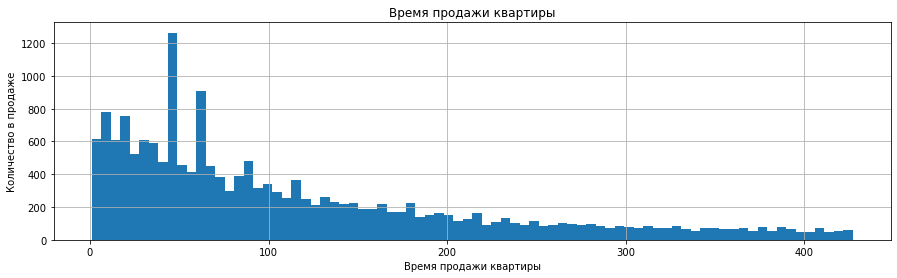

In [19]:
df['days_exposition'].hist(bins=80, range = (1, 427), figsize=(15, 4))
plt.title('Время продажи квартиры')
plt.xlabel('Время продажи квартиры')
plt.ylabel('Количество в продаже')

Итак пропуски в столбцах необходимо заполнять учитывая местоположение квартиры
Перебираем Питер и  поселки. Там где обьявлений больше 50 заменяем пропуски на медиану по поселку,  там где меньше на общую медиану. Цифры 50 взята как менее 5% от общего количества 

In [20]:
#print('Медиана {} {} {:.2f}'.format(city, column, median))
#work_columns = ['ceiling_height', 'floors_total', 'living_area','kitchen_area','days_exposition' ]
#for city in df['locality_name'].unique():
    #for column in work_columns:
#         median = df.loc[df['locality_name'] == city, column].median()
#         if (df['locality_name'] == city).sum()> 50:
#             df.loc[(df[column].isna()) & (df['locality_name'] == city), column] = median
#         else:
#             df[column] = df[column].fillna(df[column].median())


In [21]:
display(df.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [22]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


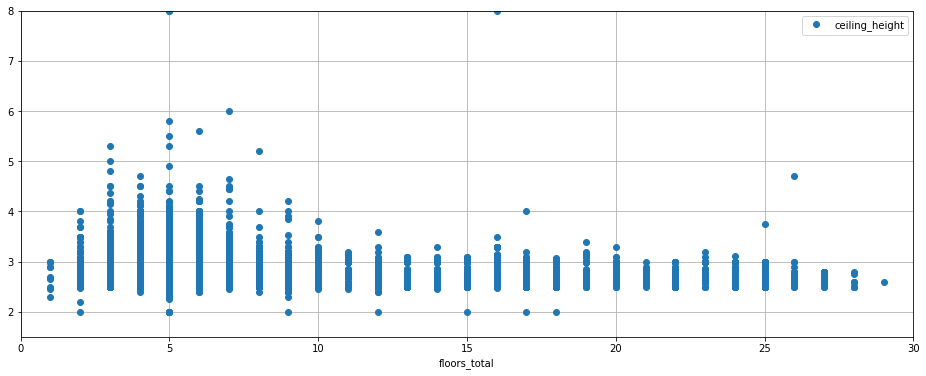

In [23]:
df.plot(x='floors_total', y='ceiling_height', ylim=(1.5, 8), xlim=(0, 30), style='o', grid=True,  figsize=(16, 6));

<div class="alert alert-info">
<strong>Довольно интересная зависимость наибольшая высота потолков наблюдается в домах небольшой этажности. Это логично в отличие от 20 ти этажных "человейников" квартиры в домах малой этажности более дорогие и более комфортные</strong> </div>

In [24]:
df['floors_total'].value_counts().head()


5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
Name: floors_total, dtype: int64

<div class="alert alert-info">
    <strong>Количество пустых значений в высоте потолков</strong> </div>

In [25]:
df['ceiling_height'].isna().sum()

9195

<div class="alert alert-info">
    <strong>Попробуем сравнить медианы разных этажей</strong> </div>

In [26]:
median_3 = df.loc[df['floors_total'] == 3, 'ceiling_height'].median()
print('Медиана 3 этаж - ', median_3)
median_4 = df.loc[df['floors_total'] == 4, 'ceiling_height'].median()
print('Медиана 4 этаж - ', median_4)
median_5 = df.loc[df['floors_total'] == 5, 'ceiling_height'].median()
print('Медиана 5 этаж - ', median_5)
median_6 = df.loc[df['floors_total'] == 6, 'ceiling_height'].median()
print('Медиана 6 этаж - ', median_6)
median_15 = df.loc[df['floors_total'] == 15, 'ceiling_height'].median()
print('Медиана 15 этаж - ', median_15)

Медиана 3 этаж -  2.8
Медиана 4 этаж -  3.0
Медиана 5 этаж -  2.55
Медиана 6 этаж -  3.0
Медиана 15 этаж -  2.7


<div class="alert alert-info">
<strong>Медианы разные попробуем вставить медианные значения в зависимости от этажа</strong> </div>

In [27]:
for city in df['locality_name'].unique():
    for floor in df['floors_total'].unique():
        median = df.loc[df['floors_total'] == floor, 'ceiling_height'].median()
        df.loc[(df['ceiling_height'].isna()) & (df['floors_total'] == floor) & (df['locality_name'] == city ),'ceiling_height'] = median
        
            


In [28]:
df['ceiling_height'].isna().sum()

112

<div class="alert alert-info">
<strong>Осталось 112 пустых строк в потолках заполним медианой столбца с учетом населенного пункта </strong> </div>

In [29]:
for city in df['locality_name'].unique():
        median = df.loc[df['locality_name'] == city, 'ceiling_height'].median()
        if (df['locality_name'] == city).sum()> 50:
            df.loc[(df['ceiling_height'].isna()) & (df['locality_name'] == city), 'ceiling_height'] = median
        else:
            df.loc[(df['ceiling_height'].isna()), 'ceiling_height'] = df['ceiling_height'].median()

In [30]:
df['ceiling_height'].isna().sum()

0

<div class="alert alert-info">
    <strong>Пропущенные значения высоты потолков заполнены </strong> </div>

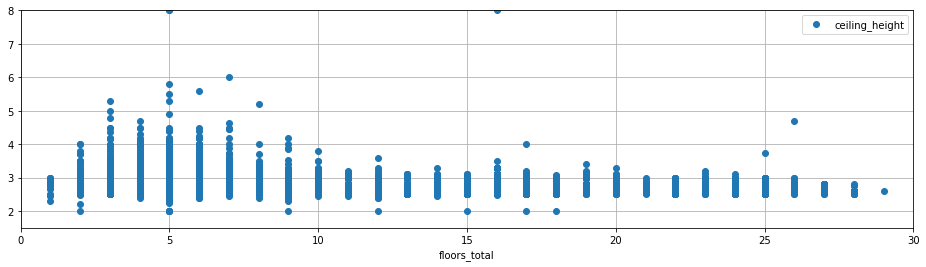

In [31]:
df.plot(x='floors_total', y='ceiling_height', ylim=(1.5, 8), xlim=(0, 30), style='o', grid=True,  figsize=(16, 4));

<div class="alert alert-info">
<strong>Проверим так же что жилая площадь зависит от площади квартиры </strong> </div>

<AxesSubplot:xlabel='total_area'>

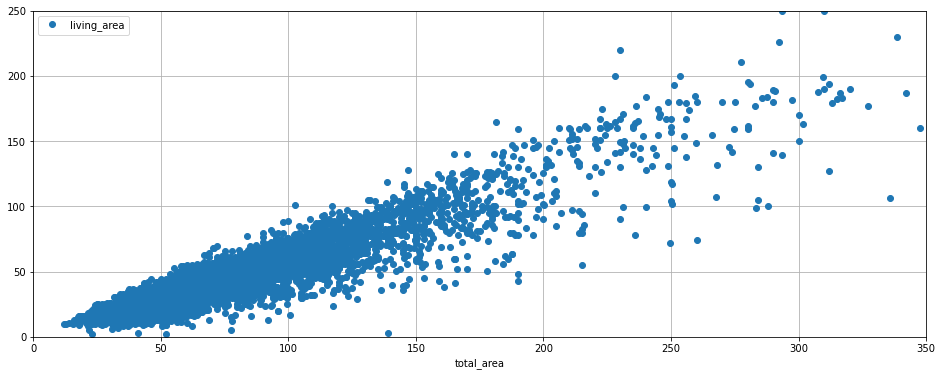

In [32]:
df.plot(x='total_area', y='living_area', ylim=(0, 250), xlim=(0, 350), style='o', grid=True,  figsize=(16, 6))

<div class="alert alert-info">
    <strong>Тут зависимость четко прослеживается</strong> </div>

In [33]:
df['living_area'].isna().sum()

1903

<div class="alert alert-info">
    <strong> Проставим медианы на место пропущенных значений исходя из диапазона площади квартир </strong> </div>

In [34]:
median_50 = df.loc[df['total_area'] <= 50, 'living_area'].median()
print('Медиана жил площ до 50 кв м - ', median_50)

median_50_100 = df.loc[(50 < df['total_area']) & (df['total_area'] <= 100), 'living_area'].median()
print('Медиана жил площ c 50 до 100 кв м - ', median_50_100)

median_100_150 = df.loc[(100 < df['total_area']) & (df['total_area'] <= 150), 'living_area'].median()
print('Медиана жил площ c 100 до 150 кв м - ', median_100_150)

median_150_200 = df.loc[(150 < df['total_area']) & (df['total_area'] <= 200), 'living_area'].median()
print('Медиана жил площ c 150 до 200 кв м - ', median_150_200)

median_200_250 = df.loc[(200 < df['total_area']) & (df['total_area'] <= 250), 'living_area'].median()
print('Медиана жил площ c 200 до 250 кв м - ', median_200_250)

median_250_300 = df.loc[(250 < df['total_area']) & (df['total_area'] <= 300), 'living_area'].median()
print('Медиана жил площ c 250 до 300 кв м - ', median_250_300)

median_300_350 = df.loc[(300 < df['total_area']) & (df['total_area'] <= 350), 'living_area'].median()
print('Медиана жил площ c 300 до 350 кв м - ', median_300_350)

Медиана жил площ до 50 кв м -  18.4
Медиана жил площ c 50 до 100 кв м -  39.6
Медиана жил площ c 100 до 150 кв м -  68.4
Медиана жил площ c 150 до 200 кв м -  99.1
Медиана жил площ c 200 до 250 кв м -  145.0
Медиана жил площ c 250 до 300 кв м -  164.5
Медиана жил площ c 300 до 350 кв м -  187.0


In [35]:
for city in df['total_area']:
        if city <= 50:
            df.loc[df['living_area'].isna(), 'living_area'] = median_50
        if 50 < city <= 100:
            df.loc[df['living_area'].isna(), 'living_area'] = median_50_100
        if 100 < city <= 150:
            df.loc[df['living_area'].isna(), 'living_area'] = median_100_150
        if 150 < city <= 200:
            df.loc[df['living_area'].isna(), 'living_area'] = median_150_200
        if 200 < city <= 250:
            df.loc[df['living_area'].isna(), 'living_area'] = median_200_250
        if 250 < city <= 300:
            df.loc[df['living_area'].isna(), 'living_area'] = median_250_300
        if 300 < city <= 350:
            df.loc[df['living_area'].isna(), 'living_area'] = median_300_350
        
            
        

In [36]:
df['living_area'].isna().sum()

0

<div class="alert alert-info">
    <strong> Пропуски в 'living_area' заполнили</strong> </div>

<div class="alert alert-info">
    <strong>Заполним пропуски  'kitchen_area'
    тот же принцип что и в жилой площади заполняем медианами согласно общей площади </strong> </div>

In [37]:
df['kitchen_area'].isna().sum()

2278

In [38]:
median_k_50 = df.loc[df['total_area'] <= 50, 'kitchen_area'].median()

median_k_50_100 = df.loc[(50 < df['total_area']) & (df['total_area'] <= 100), 'kitchen_area'].median()

median_k_100_150 = df.loc[(100 < df['total_area']) & (df['total_area'] <= 150), 'kitchen_area'].median()

median_k_150_200 = df.loc[(150 < df['total_area']) & (df['total_area'] <= 200), 'kitchen_area'].median()

median_k_200_250 = df.loc[(200 < df['total_area']) & (df['total_area'] <= 250), 'kitchen_area'].median()

median_k_250_300 = df.loc[(250 < df['total_area']) & (df['total_area'] <= 300), 'kitchen_area'].median()

median_k_300_350 = df.loc[(300 < df['total_area']) & (df['total_area'] <= 350), 'kitchen_area'].median()


In [39]:
for city in df['total_area']:
        if city <= 50:
            df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = median_k_50
        if 50 < city <= 100:
            df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = median_k_50_100
        if 100 < city <= 150:
            df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = median_k_100_150
        if 150 < city <= 200:
            df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = median_k_150_200
        if 200 < city <= 250:
            df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = median_k_200_250
        if 250 < city <= 300:
            df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = median_k_250_300
        if 300 < city <= 350:
            df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = median_k_300_350
        

In [40]:
df['kitchen_area'].isna().sum()

0

<div class="alert alert-info">
    <strong>Попробуем заполнить пропуски 'kitchen_area' альтернативным методом, попробуем найти койфециент соотношения общей площади к площади кухни и заполним пропуски с умножая общую площадь на этот коэффициент</strong> </div>

In [41]:
df['kitchen_area'].isna().sum()

0

In [42]:
median_aver_kitch = (df['kitchen_area']/df['total_area']).median()
print(median_aver_kitch)


0.1801801801801802


In [43]:
#df.loc[(df['kitchen_area'].isna()), 'kitchen_area'] = median_aver_kitch * df.loc[(df['kitchen_area'].isna()), 'total_area']

<div class="alert alert-info">
    <strong>Тоже работает</strong> </div>

In [44]:
df['kitchen_area'].isna().sum()

0

<div class="alert alert-info">
    <strong>Заполним пропуски 'floors_total' учитывая местоположение квартиры
Перебираем Питер и поселки. Там где обьявлений больше 50 заменяем пропуски на медиану по поселку, там где меньше на общую медиану. Цифры 50 взята как менее 5% от общего количества¶</strong> </div>

In [45]:
df['floors_total'].isna().sum()

86

In [46]:
for city in df['locality_name'].unique():
        median = df.loc[df['locality_name'] == city, 'floors_total'].median()
        if (df['locality_name'] == city).sum()> 50:
            df.loc[(df['floors_total' ].isna()) & (df['locality_name'] == city), 'floors_total' ] = median 
        else:
            df.loc[(df['floors_total' ].isna()), 'floors_total' ] = df['ceiling_height'].median()

In [47]:
df['floors_total'].isna().sum()

0

<div class="alert alert-info">
    <strong>Заполним пропуски 'days_exposition' учитывая местоположение квартиры Перебираем Питер и поселки. Там где обьявлений больше 50 заменяем пропуски на медиану по поселку, там где меньше на общую медиану. Цифры 50 взята как менее 5% от общего количества¶</strong> </div>

In [48]:
print(df['days_exposition'].median())
print(df.loc[(df['locality_name'] == 'санкт-петербург'), 'days_exposition'].median())  	
print(df.loc[(df['locality_name'] == 'посёлок шушары'), 'days_exposition'].median())

95.0
95.0
92.0


In [49]:
df['days_exposition'].isna().sum()

3181

In [50]:
for city in df['locality_name'].unique():
        median = df.loc[df['locality_name'] == city, 'days_exposition'].median()
        if (df['locality_name'] == city).sum()> 50:
            df.loc[(df['days_exposition'].isna()) & (df['locality_name'] == city), 'days_exposition'] = median 
        else:
            df.loc[(df['days_exposition'].isna()), 'days_exposition'] = df['days_exposition'].median()

In [51]:
df['days_exposition'].isna().sum()

0

### Проверим значение в столбце is_apartment - апартаменты (булев тип) мы  видим три значение , очевидно что их должно быть два либо False либо True меняем nan на False

In [52]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [53]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].unique()

array([False,  True])

In [54]:
display(df.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64

### NaN в столбце балконов balcony это его отсутствие в квартире, меняем значение на ноль

In [55]:
df['balcony'] = df['balcony'].fillna(0)
display(df['balcony'].isnull().sum())

0

### NaN в столбце parks_around3000 — число парков в радиусе 3 км  
### ponds_around3000 — число водоёмов в радиусе 3 км - это их отсутствие меняем значение на ноль¶

In [56]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
display(df.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition             0
dtype: int64

### Квартиры без местоположения locality_name == NaN можно убрать их меннее 0.2% от общего количества

In [57]:
print(49/(23699/100),'% от общего количества квартир без обозначения местоположения')

0.2067597788936242 % от общего количества квартир без обозначения местоположения


In [58]:
 df = df[~df['locality_name'].isna()] #Попробуй не удалять их, а отфильтровать те строки, в которых нет пропусков в новый фрейм.
#Например, вот так: df2 = df[~df['a'].isna()]  ~ это логическое отрицание
display(df.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition             0
dtype: int64

###  Итак у нас остались пропуски

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- cityCenters_nearest — расстояние до центра города (м)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
согласно превью данные были внесены автоматическитакое большое количество пропусков связано с неточной настройкой алгоритма, скорее всего дальше определенного расстояния алгоритм считал что рядом ничего нет и проставлял пропуск, **будем считать что пропуск это очень далеко**


### Проверим эту мысль
мы видим что алгорим вносит данные достаточно ровно без выбросов, mean практически равно median, поэтому предположение верно
### Оставим пропуски как показатели удаленности от данных обьектов

In [59]:
df['ponds_nearest'].describe()

count    9085.000000
mean      518.059879
std       277.841733
min        13.000000
25%       293.000000
50%       502.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [60]:
display(df.isnull().sum())


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition             0
dtype: int64

In [61]:
df['airports_nearest'].describe()

count    18116.000000
mean     28803.225878
std      12637.314144
min          0.000000
25%      18575.750000
50%      26756.500000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [62]:
df['cityCenters_nearest'].describe()

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [63]:
df['parks_around3000'].describe()

count    23650.000000
mean         0.469091
std          0.748458
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

In [64]:
df['parks_nearest'].describe()

count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

### Смотрим типы данных в базе

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [66]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.75,11.0,18.6,1,False,False,False,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.55,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.60,14.0,68.4,9,False,False,False,15.6,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


###  Видим что дата имеет значение - first_day_exposition   
### 23650 non-null - object, меняем ее на тип даты так лучше с этими данными работать в дальнейшем

In [67]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

In [68]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,False,False,False,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,68.4,9,False,False,False,15.6,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  float64       
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

### Шаг 3. Добавим в таблицу  цену кв. метра

In [70]:
df['price_square_meter'] = (df['last_price']/df['total_area']).astype(int)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,120370
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,False,False,False,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,68.4,9,False,False,False,15.6,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000


### День недели, месяц и год публикации объявления;

<div class="alert alert-info">
    <strong>добавляем номер дня, месяц и год публикации</strong> </div>

In [71]:
df['day_week_pub'] = df['first_day_exposition'].dt.weekday
df['day_month_pub'] = df['first_day_exposition'].dt.month
df['day_year_pub'] = df['first_day_exposition'].dt.year

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_week_pub,day_month_pub,day_year_pub
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,120370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,False,False,False,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,68.4,9,False,False,False,15.6,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018


**Добавляем сам день**

In [72]:
#df['day_week_month_year_pub'] = df['first_day_exposition'].dt.weekday_name
#df.head()

### Добавляем столбец этаж квартиры; варианты — первый, последний, другой;

In [73]:
def floor_flat(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return'последний'
    else:
        return 'другой'
df['floor_flat'] = df.apply(floor_flat, axis = 1)# Т.к. нужен доступ к двум столбцам сразу, 
# то функцию нужно применять не к столбцу, а к строке:
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_week_pub,day_month_pub,day_year_pub,floor_flat
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,120370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,False,False,False,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,68.4,9,False,False,False,15.6,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой


### Добавляем столбец соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [74]:
df['ratio_living_total_area']=df['living_area']/df['total_area']
df['ratio_kitchent_total_area']=df['kitchen_area']/df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_week_pub,day_month_pub,day_year_pub,floor_flat,ratio_living_total_area,ratio_kitchent_total_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,False,False,False,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,68.4,9,False,False,False,15.6,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015,другой,0.430189,0.098113
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000


### Шаг 4. Проведем исследовательский анализ данных

#### Изучим следующие параметры: площадь, цена, число комнат, высота потолков.  Построим гистограммы

Text(0, 0.5, 'Количество в продаже')

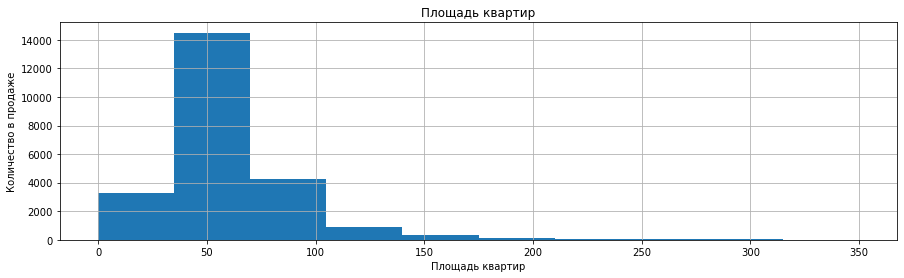

In [75]:
df['total_area'].hist(bins=10, range = (0, 350), figsize=(15, 4))
plt.title('Площадь квартир')
plt.xlabel('Площадь квартир')
plt.ylabel('Количество в продаже')

In [76]:

df['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

### Посмотрим на выбросы в боксплот

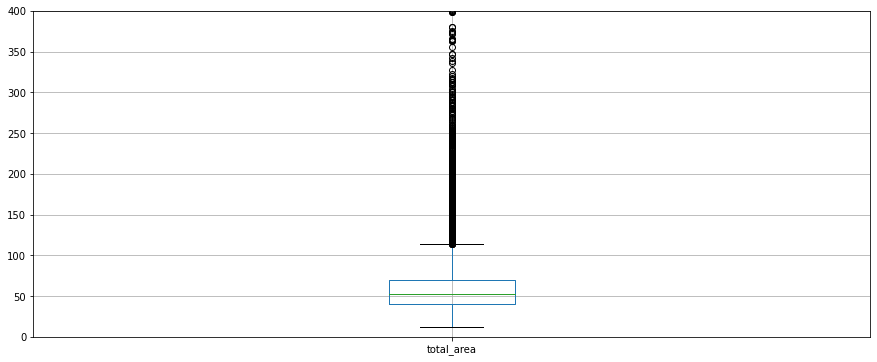

In [77]:
df.boxplot('total_area', figsize=(15,6))
plt.ylim(0, 400)
plt.show()

In [78]:
q1 = df['total_area'].quantile(0.05)
q3 = df['total_area'].quantile(0.95)
iqr = q3 - q1

mistash_down = q1 - 1.5 * iqr
mistash_up = q3 + 1.5 * iqr
print('Нижний ус = ', mistash_down)
print('Верхний ус = ', mistash_up)

Нижний ус =  -96.5
Верхний ус =  243.5


### Построим violin plot

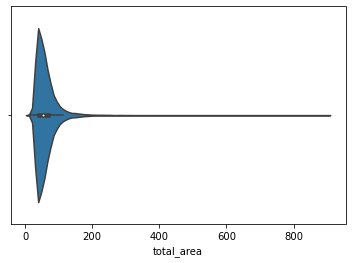

In [79]:
sns.violinplot(x='total_area', data=df, figsize=(17, 7));
#plt.ylim(0, 350)
#plt.show()

<AxesSubplot:xlabel='total_area'>

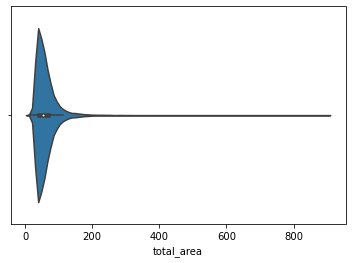

In [80]:
sns.violinplot(x=df['total_area'])

**смотрим какой процент занимают выбросы**

In [81]:
display(((df['total_area'] > 244).sum())/(df['total_area'].count().sum()))

0.005285412262156448

In [82]:
display((df['total_area'] > 244).sum())

125

In [83]:
display(df['total_area'].count())

23650

**удаляем их**

In [84]:
df = df[df['total_area'] < 244]
display((df['total_area'] > 244).sum())

0

In [85]:
display(df['total_area'].count())

23524

<div class="alert alert-info">
<strong>Диаграмма после удаления усов  Плащадь квартир </strong> </div>

Text(0, 0.5, 'Количество в продаже')

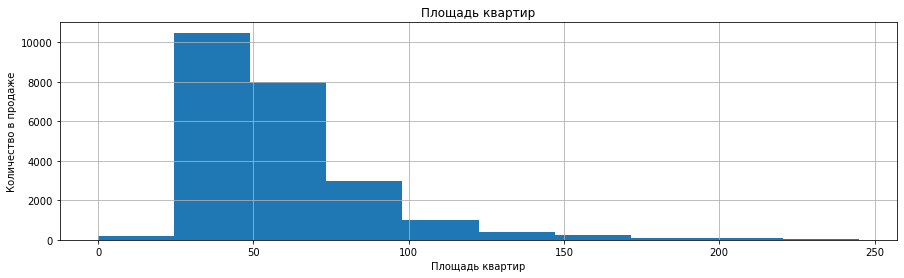

In [86]:
df['total_area'].hist(bins=10, range = (0, 245), figsize=(15, 4))
plt.title('Площадь квартир')
plt.xlabel('Площадь квартир')
plt.ylabel('Количество в продаже')

Text(0, 0.5, 'Количество в продаже')

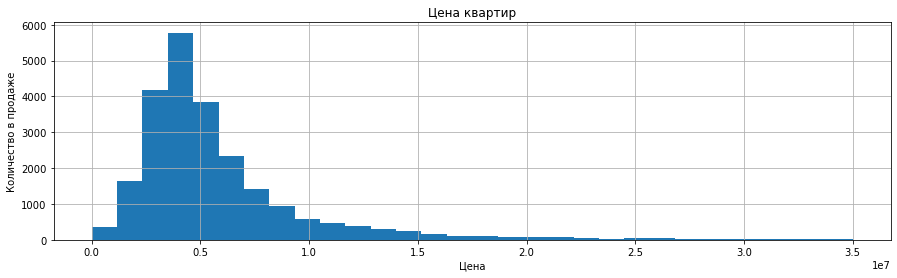

In [87]:
#df['last_price'].astype(int)
df['last_price'].hist(bins=30, range = (0, 35000000), figsize=(15, 4))
plt.title('Цена квартир')
plt.xlabel('Цена')
plt.ylabel('Количество в продаже')


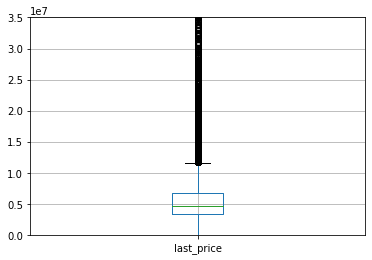

In [88]:
df.boxplot('last_price')
plt.ylim(0, 35000000)
plt.show()


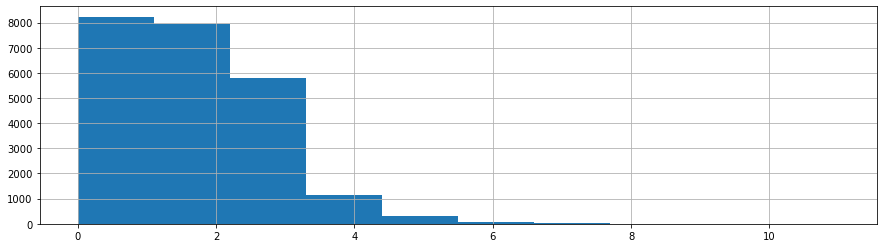

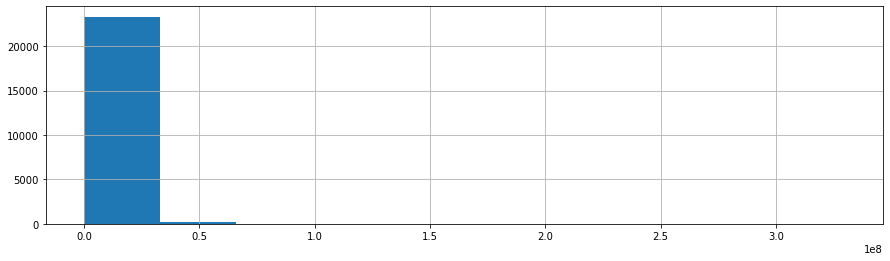

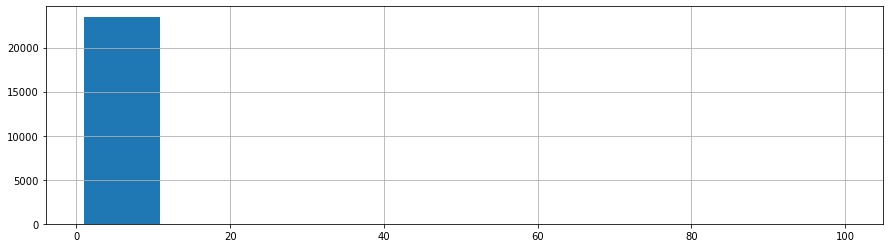

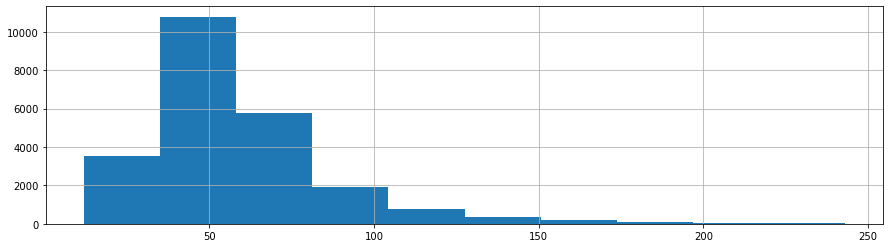

In [89]:
df_for_diagr = ['rooms', 'last_price','ceiling_height','total_area']
for diagram in df_for_diagr:
    df[diagram].hist( figsize=(15, 4))
    plt.show()


In [90]:
display(df_for_diagr)

['rooms', 'last_price', 'ceiling_height', 'total_area']

In [91]:
q1 = df['last_price'].quantile(0.05)
q3 = df['last_price'].quantile(0.95)
iqr = q3 - q1

mistash_down = q1 - 1.5 * iqr
mistash_up = q3 + 1.5 * iqr
print('Нижний ус = ', mistash_down)
print('Верхний ус = ', mistash_up)
print('Максимальное значение - ', df['last_price'].max())

Нижний ус =  -17425000.0
Верхний ус =  33975000.0
Максимальное значение -  330000000.0


<div class="alert alert-info">
    <strong>Слишком большой процент на удаление , увеличим межквартильный размах</strong> </div>

In [92]:
df['last_price']=df['last_price'].astype(int)
display((df['last_price'] == 0).sum())# проверим есть ли квартиры с 0 стоимостью
display((df['last_price']).min())


0

12190

**цена очень маленькая для такой квартиры уберем ее очевидно это ошибка внесения данных**

In [93]:
df = df[df['last_price'] > 12190]

In [94]:

df['last_price'].describe()

count    2.352300e+04
mean     6.172138e+06
std      6.975311e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

In [95]:
df['last_price'].max()

330000000

**смотрим какой процент занимают выбросы**

In [96]:
display(((df['last_price'] > 33975000).sum())/(df['last_price'].count().sum()))

0.008119712621689411

In [97]:
df['last_price'].count()

23523

In [98]:
df = df[df['last_price'] < 33975000]
display((df['last_price'] > 33975000).sum())

0

In [99]:
df['last_price'].count()

23332

<div class="alert alert-info">
    <strong>Диграмма после удаления усов цена квартиры</strong> </div>

Text(0, 0.5, 'Количество в продаже')

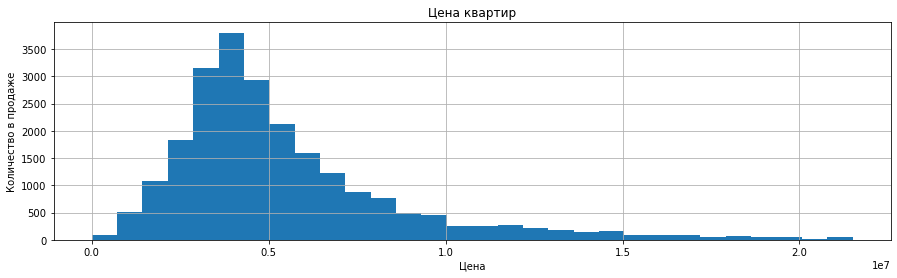

In [100]:
df['last_price'].hist(bins=30, range = (0, 21503750), figsize=(15, 4))
plt.title('Цена квартир')
plt.xlabel('Цена')
plt.ylabel('Количество в продаже')


Text(0, 0.5, 'Количество в продаже')

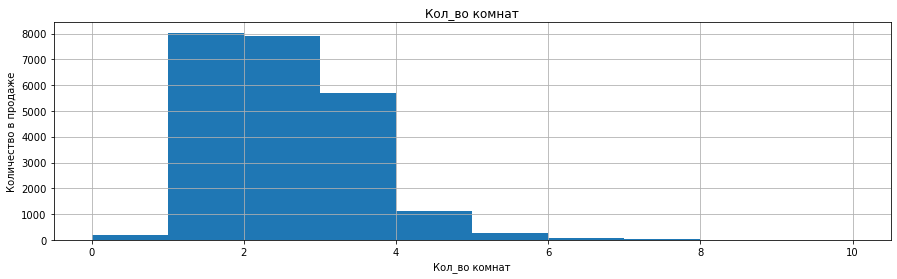

In [101]:
df['rooms'].hist(bins=10, range = (0, 10), figsize=(15, 4))
plt.title('Кол_во комнат')
plt.xlabel('Кол_во комнат')
plt.ylabel('Количество в продаже')

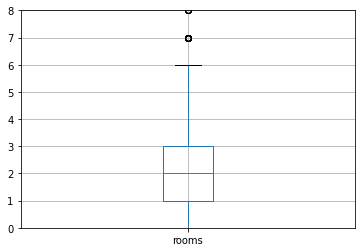

In [102]:
df.boxplot('rooms')
plt.ylim(0, 8)
plt.show()


In [103]:
df['rooms'].value_counts()

1     8031
2     7905
3     5712
4     1108
5      265
0      196
6       73
7       33
8        5
11       2
10       1
9        1
Name: rooms, dtype: int64

In [104]:
df['rooms'].describe()

count    23332.000000
mean         2.035145
std          1.009219
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

### Выявили квартиры с нулевым количеством комнат скорее всего ошибка внесения заменим на медиану

In [105]:
display(df.query('rooms == 0').head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_week_pub,day_month_pub,day_year_pub,floor_flat,ratio_living_total_area,ratio_kitchent_total_area
144,1,2450000,27.00,2017-03-30,0,2.75,24.0,15.50,2,False,True,False,15.6,2.0,посёлок мурино,NaN,NaN,0.0,NaN,0.0,NaN,181.0,90740,3,3,2017,другой,0.574074,0.577778
349,4,2320000,25.00,2017-09-27,0,2.60,14.0,17.00,1,False,False,True,15.6,0.0,деревня кудрово,NaN,NaN,0.0,NaN,0.0,NaN,45.0,92800,2,9,2017,первый,0.680000,0.624000
440,8,2480000,27.11,2018-03-12,0,2.70,17.0,24.75,4,False,True,False,15.6,2.0,санкт-петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,91479,0,3,2018,другой,0.912947,0.575433
508,0,3375000,34.40,2017-03-28,0,2.66,26.0,24.30,19,False,False,True,15.6,1.0,посёлок парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,98110,1,3,2017,другой,0.706395,0.453488
608,2,1850000,25.00,2019-02-20,0,2.60,10.0,68.40,7,False,True,False,15.6,0.0,посёлок шушары,NaN,NaN,0.0,NaN,0.0,NaN,29.0,74000,2,2,2019,другой,2.736000,0.624000


### Посчитаем количество квартир с нулевым значением комнат

In [106]:
#df['rooms'].value_counts()
df['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0, 11,  7,  8,  9, 10], dtype=int64)

In [107]:
print((df['rooms'] == 0).sum())
print((df['rooms'] == 1).sum())
print((df['rooms']).count().sum())

196
8031
23332


In [108]:
count = 0
for zero in df['rooms']:
    if zero == 0:
        count+=1
print(count)        
    

196


<div class="alert alert-info">
    <strong>Скорее всего комнаты с нулевым количеством комнат это студии , но судя по их небольшому количеству скорее всего часть студий вносится как однокомнатные квартиры, те нет четкого правила как вносить студии, этот момент необходимо обговорить с теми кто вносит квартиры и сделать стандарт внесения в форме на сайте. Заменим нули на еденицы, в любом случае этих квартир немного даже если я ошибся сильного влияния это не окажет</strong> </div>

In [109]:
#df['rooms'].astype(int)
#df['rooms'] = df['rooms'].isnull(df['rooms'].median())
df.loc[df['rooms'] == 0, 'rooms'] = 1
display((df['rooms'] == 0).sum())

0

**Посмотрим на диаграмму после изменения**

Text(0, 0.5, 'Количество в продаже')

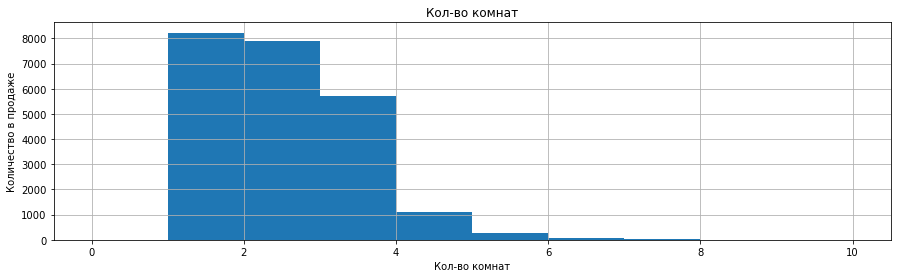

In [110]:
df['rooms'].hist(bins=10, range = (0, 10), figsize=(15, 4))
plt.title('Кол-во комнат')
plt.xlabel('Кол-во комнат')
plt.ylabel('Количество в продаже')

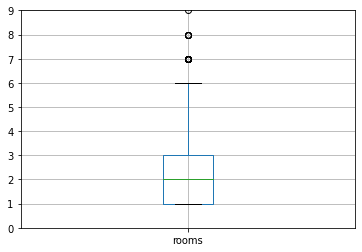

In [111]:
df.boxplot('rooms')
plt.ylim(0, 9)
plt.show()


In [112]:
q1 = df['rooms'].quantile(0.25)
q3 = df['rooms'].quantile(0.75)
iqr = q3 - q1

mistash_down = q1 - 1.5 * iqr
mistash_up = q3 + 1.5 * iqr
print('Нижний ус = ', mistash_down)
print('Верхний ус = ', mistash_up)

Нижний ус =  -2.0
Верхний ус =  6.0


**смотрим какой процент занимают выбросы**

In [113]:
print((df['rooms'] > 6).sum())

42


In [114]:
print(df['rooms'].value_counts())

1     8227
2     7905
3     5712
4     1108
5      265
6       73
7       33
8        5
11       2
10       1
9        1
Name: rooms, dtype: int64


In [115]:
display(((df['rooms'] > 6).sum())/(df['rooms'].count().sum()))

0.001800102863020744

Text(0, 0.5, 'Количество в продаже')

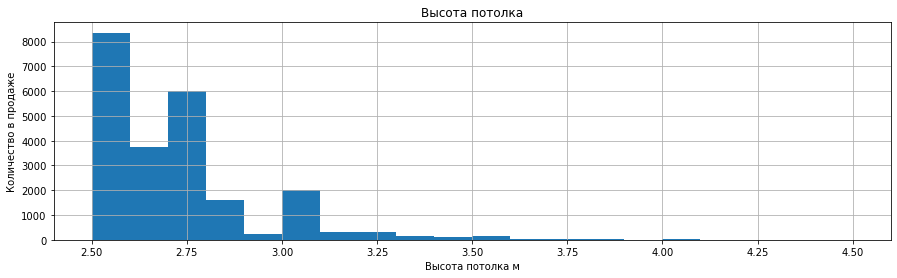

In [116]:
df['ceiling_height'].hist(bins=20, range = (2.5, 4.5), figsize=(15, 4))
plt.title('Высота потолка')
plt.xlabel('Высота потолка м')
plt.ylabel('Количество в продаже')

### Попробуем построить диаграмму размаха

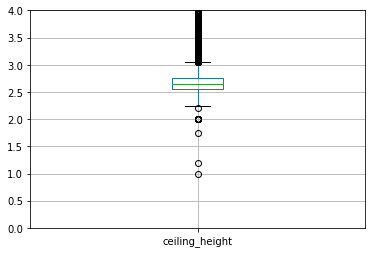

In [117]:
df.boxplot('ceiling_height')
plt.ylim(0, 4)
plt.show()


In [118]:
q1 = df['ceiling_height'].quantile(0.05)
q3 = df['ceiling_height'].quantile(0.95)
iqr = q3 - q1

mistash_down = q1 - 1.5 * iqr
mistash_up = q3 + 1.5 * iqr
print('Нижний ус = ', mistash_down)
print('Верхний ус = ', mistash_up)

Нижний ус =  1.5999999999999999
Верхний ус =  4.0


<div class="alert alert-info">
    <strong>при значении quantile 25 и 75 % удаляется более 10% значений это много снизим квантили до 5 и 95 %</strong> </div>

**смотрим какой процент занимают выбросы**

In [119]:
print((df['ceiling_height'] > 1.75).sum())
print(df['ceiling_height'].count().sum())

23329
23332


In [120]:
display(((df['ceiling_height'] < 1.75).sum())/(df['ceiling_height'].count().sum()))

8.571918395336877e-05

In [121]:
display(((df['ceiling_height'] > 3.75).sum())/(df['ceiling_height'].count().sum()))

0.005957483284759129

<div class="alert alert-info">
    <strong>смотрим кличество значений</strong> </div>

In [122]:
df['ceiling_height'].count()

23332

**Удаляем значения ниже нижнего уса и выше вехнего уса**

In [123]:
df = df[df['ceiling_height'] > 1.75]
display((df['ceiling_height'] > 1.75).sum())
df = df[df['ceiling_height'] < 3.75]
display((df['ceiling_height'] < 3.75).sum())

23329

23182

<div class="alert alert-info">
<strong>смотрим кличество значений</strong> </div>

In [124]:
df['ceiling_height'].count()

23182

<div class="alert alert-info">
<strong>Диаграмма после удаления усов высота потолка</strong> </div>

Text(0, 0.5, 'Количество в продаже')

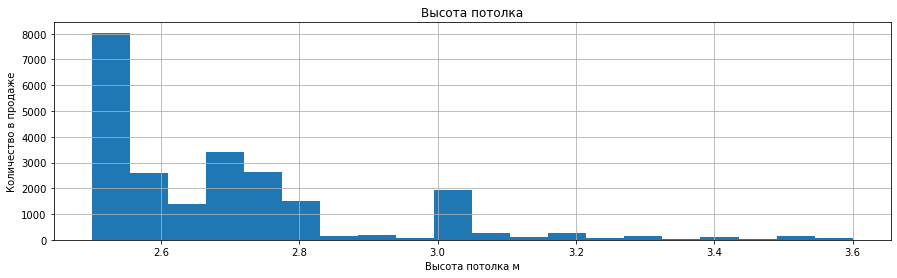

In [125]:
df['ceiling_height'].hist(bins=20, range = (2.5, 3.6), figsize=(15, 4))
plt.title('Высота потолка')
plt.xlabel('Высота потолка м')
plt.ylabel('Количество в продаже')

<div class="alert alert-info">
    <strong>Несмотря на звание "второй столицы" наибольшее количество продаваемых квартир, бюджетного класса 1-2 комнатные с низкими потолками, площадью до 50 кв метров скорее всего это новостройки. Было бы интресно посмотреть на количество в продаже квартир студий но к сожалению из нестандартизированного вноса данных это сделать сложно </strong> </div>

### Изучим время продажи квартиры. Построим гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Text(0, 0.5, 'Количество проданных')

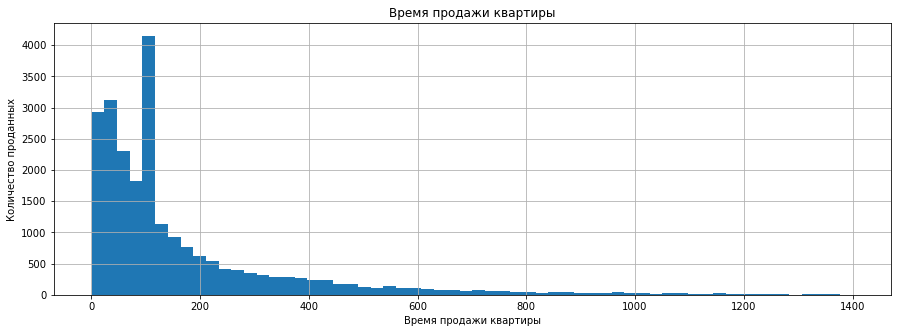

In [126]:
df['days_exposition'].hist(bins=60, range = (1, 1400), figsize=(15, 5))
plt.title('Время продажи квартиры')
plt.xlabel('Время продажи квартиры')
plt.ylabel('Количество проданных')

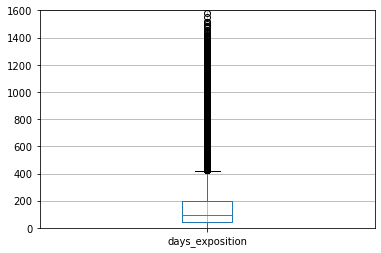

In [127]:
df.boxplot('days_exposition')
plt.ylim(0, 1600)
plt.show()

In [128]:
df['days_exposition'].describe()

count    23182.000000
mean       167.911807
std        204.899227
min          1.000000
25%         45.000000
50%         95.000000
75%        196.000000
max       1580.000000
Name: days_exposition, dtype: float64

### Вычислим усы межквартильного размаха чтобы убрать выбросы

In [129]:
q1 = df['days_exposition'].quantile(0.05)
q3 = df['days_exposition'].quantile(0.95)
iqr = q3 - q1

mistash_down = q1 - 1.5 * iqr
mistash_up = q3 + 1.5 * iqr
print('Нижний ус = ', mistash_down)
print('Верхний ус = ', mistash_up)

Нижний ус =  -873.5
Верхний ус =  1482.5


<div class="alert alert-info">
    <strong>при значении quantile 25 и 75 % удаляется более 7% значений это много снизим квантили до 5 и 95 %</strong> </div>

### Выясним сколько у нас значений выше верхнего уса

In [130]:
display(len(df[df['days_exposition'] > 1482]))

9

In [131]:
display((df['days_exposition'] > 1482).sum())

9

In [132]:
df['days_exposition'].describe()

count    23182.000000
mean       167.911807
std        204.899227
min          1.000000
25%         45.000000
50%         95.000000
75%        196.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Процент от общего количества**

In [133]:
display(df['days_exposition'].count())

23182

In [134]:
df.groupby(df['days_exposition'] < 1482)['days_exposition'].describe()

,count,mean,std,min,25%,50%,75%,max
days_exposition,,,,,,,,
False,9.0,1513.888889,32.674319,1484.0,1489.0,1512.0,1513.0,1580.0
True,23173.0,167.389052,203.213463,1.0,45.0,95.0,196.0,1477.0


In [135]:
df['days_exposition'].count()

23182

**Уберем выбросы все что  выше 1482**

In [136]:
df = df[df['days_exposition'] < 1482]


In [137]:
df['days_exposition'].count()

23173

Text(0, 0.5, 'Количество в продаже')

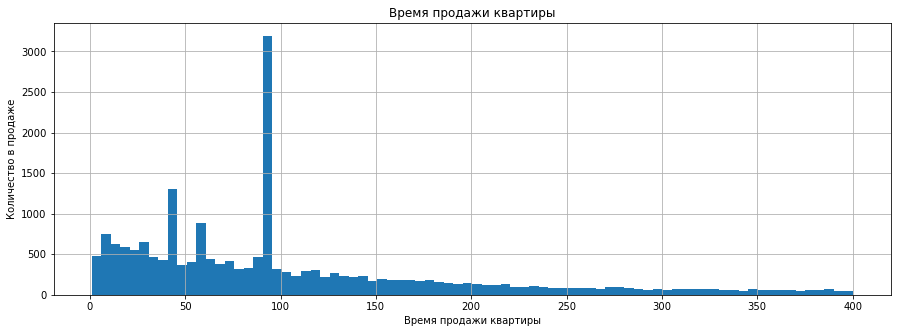

In [138]:
df['days_exposition'].hist(bins=80, range = (1, 400), figsize=(15, 5))
plt.title('Время продажи квартиры')
plt.xlabel('Время продажи квартиры')
plt.ylabel('Количество в продаже')

In [139]:
df['days_exposition'].describe()

count    23173.000000
mean       167.389052
std        203.213463
min          1.000000
25%         45.000000
50%         95.000000
75%        196.000000
max       1477.000000
Name: days_exposition, dtype: float64

[**Выброс на 95 днях, это замененные на пропуски на медиану**](#cell1)

In [140]:
display((df['days_exposition'] == 95).sum())

2892

In [141]:
df['days_exposition'].value_counts().head()

95.0    2892
45.0     876
60.0     536
7.0      232
90.0     207
Name: days_exposition, dtype: int64

### Обычно продажа занимает примерно 90 дней. 
### Cамыe быстрые продажи  продажи короче 5% перцентиля. 
### Самые медленные длиннее 95%
**На практике границами выбросов снизу и сверху обычно берут 5й и 95й (или 1й и 99й) перцентили.**

In [142]:
print('Самые быстрые продажи до ', df['days_exposition'].quantile(0.05), 'дней')

Самые быстрые продажи до  10.0 дней


In [143]:
print('Самые медленные продажи больше ', df['days_exposition'].quantile(0.95), 'дней')

Самые медленные продажи больше  596.3999999999978 дней


### Какие факторы больше всего влияют на стоимость квартиры

In [144]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_week_pub,day_month_pub,day_year_pub,floor_flat,ratio_living_total_area,ratio_kitchent_total_area
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.75,11.0,18.6,1,False,False,False,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.55,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,False,False,9.1,0.0,городской посёлок янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,95065,0,9,2018,другой,0.473684,0.299342


#### Сделаем сводную таблицу цена от площади, числа комнат, удалённости от центра

**прикинем корреляцию между данными**

In [145]:
print(df['total_area'].corr(df['last_price']))
print(df['last_price'].corr(df['total_area'])) # поменяли местами
print()
print(df['price_square_meter'].corr(df['total_area']))


0.7915608039336244
0.7915608039336245

0.1517289811410348


Чем ближе коэффициент корреляции Пирсона к крайним значениям: 1 или -1, тем сильнее взаимозависимость. Если значение близко к нулю, значит связь слабая, либо отсутствует вовсе  


**здесь у нас корреляция есть но не очень большая** 

Text(0.5, 1.0, 'Цена  кв м к площади')

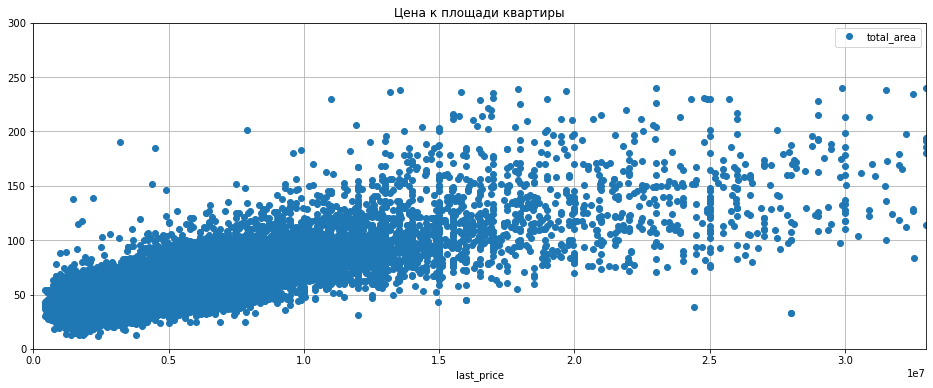

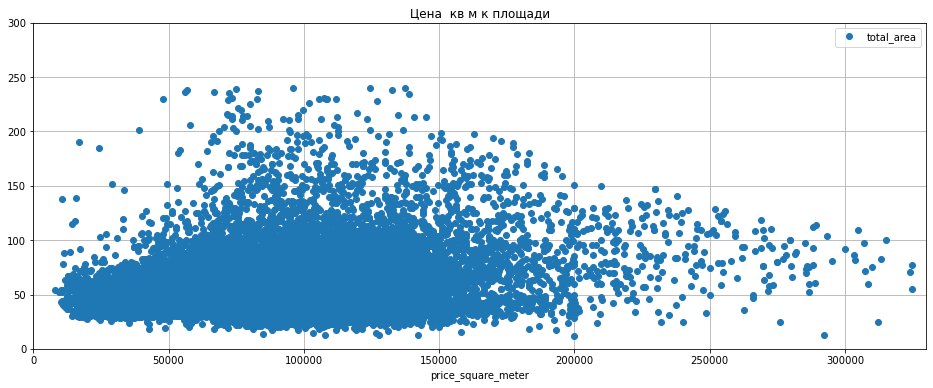

In [146]:
df.plot(x='last_price', y='total_area', ylim=(0, 300), xlim=(0, 33000000), style='o', grid=True,  figsize=(16, 6))
plt.title('Цена к площади квартиры')
df.plot(x='price_square_meter', y='total_area', ylim=(0, 300), xlim=(0, 330000), style='o', grid=True,  figsize=(16, 6))
plt.title('Цена  кв м к площади')
#display(df.head())

In [147]:
print(df['cityCenters_nearest'].corr(df['last_price']))
print(df['last_price'].corr(df['cityCenters_nearest'])) # поменяли местами 

-0.34342417731906316
-0.3434241773190632


-0.3434241773190632

-0.38302176219122636

Text(0.5, 1.0, 'Цена кв м к удаленности от центра квартиры без сортировки')

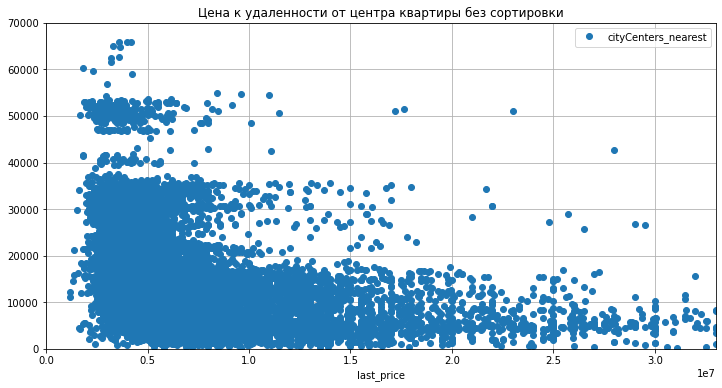

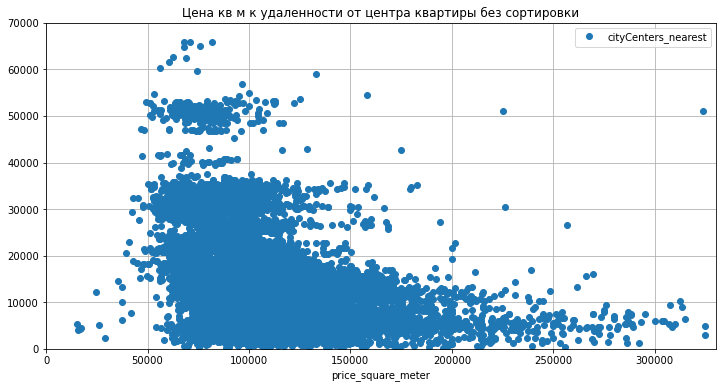

In [148]:
display(df['last_price'].corr(df['cityCenters_nearest']))
display(df['price_square_meter'].corr(df['cityCenters_nearest']))
df.plot(x='last_price', y='cityCenters_nearest', ylim=(0, 70000), xlim=(0, 33000000), style='o', grid=True,  figsize=(12, 6))
plt.title('Цена к удаленности от центра квартиры без сортировки')
df.plot(x='price_square_meter', y='cityCenters_nearest', ylim=(0, 70000), xlim=(0, 330000), style='o', grid=True,  figsize=(12, 6))
plt.title('Цена кв м к удаленности от центра квартиры без сортировки')

0.5103845513196288

-0.0611215456930861

Text(0.5, 1.0, 'Цена кв м числу комнат без сортировки')

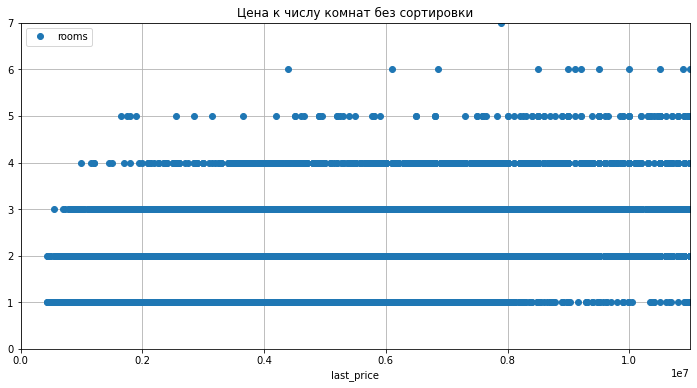

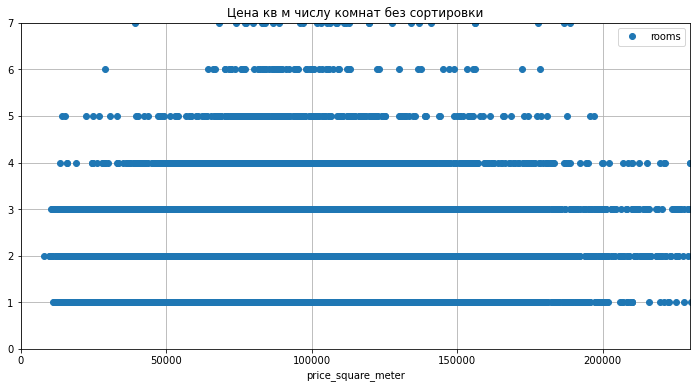

In [149]:
display(df['last_price'].corr(df['rooms']))
display(df['price_square_meter'].corr(df['rooms']))
df.plot(x='last_price', y='rooms', ylim=(0, 7), xlim=(0, 11000000), style='o', grid=True,  figsize=(12, 6))
plt.title('Цена к числу комнат без сортировки')
df.plot(x='price_square_meter', y='rooms', ylim=(0, 7), xlim=(0, 230000), style='o', grid=True,  figsize=(12, 6))
plt.title('Цена кв м числу комнат без сортировки')

**выше взяли общие данные из таблицы без учета места расположения квартиры, количества комнат и этажа**

**прикинем где и сколько квартир в продаже в Питере и Мурино чтобы посмотреть корреляцию по наиболее распостранненым**

In [150]:
df['locality_name'].value_counts().head(5)

санкт-петербург    15282
посёлок мурино       520
посёлок шушары       439
всеволожск           396
пушкин               361
Name: locality_name, dtype: int64

**Рассмотрим применительно к Спб как соотносится цена от площади, числа комнат, удалённости от центра**

'Цена'

count    1.528200e+04
mean     6.871475e+06
std      4.372381e+06
min      1.190000e+06
25%      4.200000e+06
50%      5.450000e+06
75%      7.845500e+06
max      3.380000e+07
Name: last_price, dtype: float64

'Площадь квартир'

count    15282.000000
mean        60.972648
std         29.033621
min         12.000000
25%         41.000000
50%         54.000000
75%         72.000000
max        240.000000
Name: total_area, dtype: float64

'Число комнат'

count    15282.000000
mean         2.123806
std          1.042885
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

'Удаленость от центра'

count    15230.000000
mean     11773.054957
std       4760.161067
min        181.000000
25%       8627.250000
50%      12363.000000
75%      15009.750000
max      29493.000000
Name: cityCenters_nearest, dtype: float64

Text(0.5, 1.0, 'Цена к удаленности от центра площадь квартир от 45 да 55')

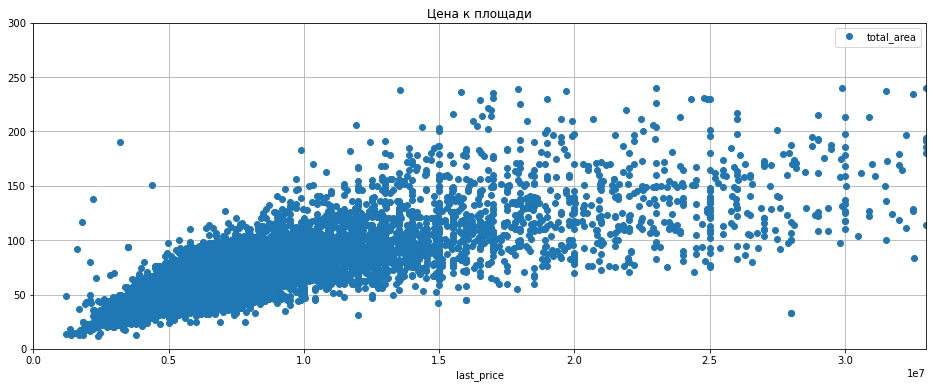

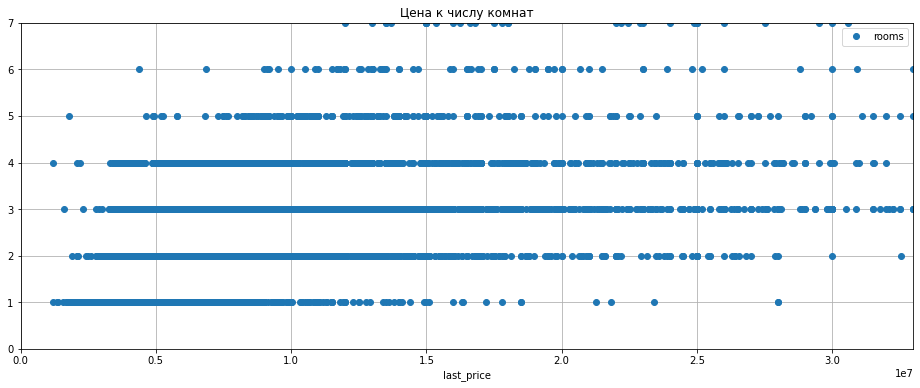

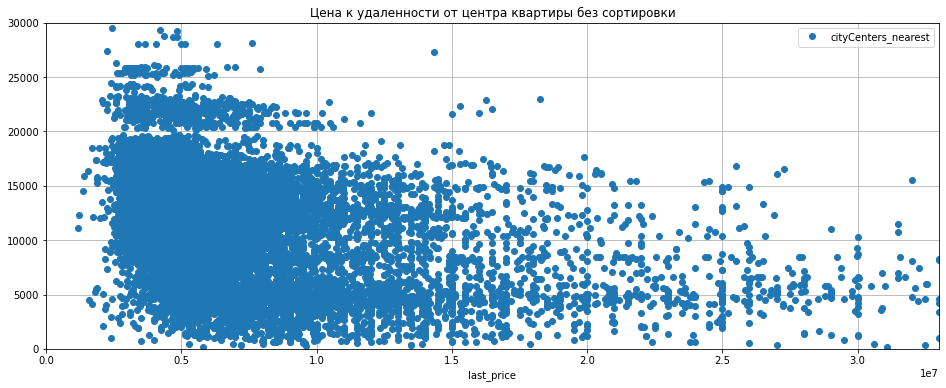

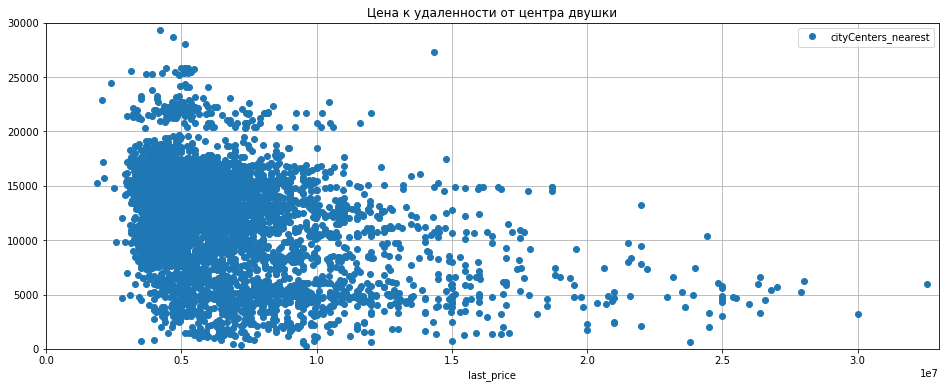

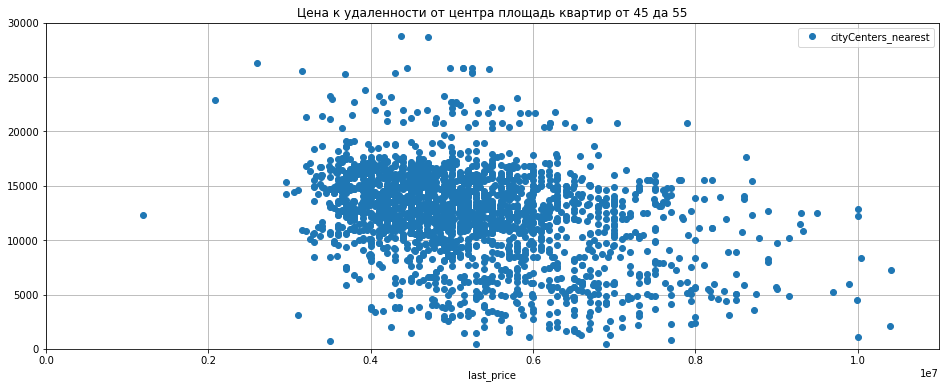

In [151]:
df['total_area'] = df['total_area'].astype(int)
#df_spb = df[df['locality_name'] == 'санкт-петербург']
df_spb = df.query('locality_name == "санкт-петербург"')

'''Проверим будет ли зависимость если мы оставим только однокомнатные квартиры например'''

df_spb_rooms1 = df.query('locality_name == "санкт-петербург" and rooms==2')

'''Проверим будет ли зависимость если мы ограничим разброс по площади например'''

df_spb_area = df.query('locality_name == "санкт-петербург" and 45 < total_area < 55')

display('Цена', df_spb['last_price'].describe())
display('Площадь квартир',df_spb['total_area'].describe())
display('Число комнат',df_spb['rooms'].describe())
display('Удаленость от центра',df_spb['cityCenters_nearest'].describe())
df_spb.plot(x='last_price', y='total_area', ylim=(0, 300), xlim=(0, 33000000), style='o', grid=True,  figsize=(16, 6))
plt.title('Цена к площади')
df_spb.plot(x='last_price', y='rooms', ylim=(0, 7), xlim=(0, 33000000), style='o', grid=True,  figsize=(16, 6))
plt.title('Цена к числу комнат')
df_spb.plot(x='last_price', y='cityCenters_nearest', ylim=(0, 30000), xlim=(0, 33000000), style='o', grid=True,  figsize=(16, 6))
plt.title('Цена к удаленности от центра квартиры без сортировки')
df_spb_rooms1.plot(x='last_price', y='cityCenters_nearest', ylim=(0, 30000), xlim=(0, 33000000), style='o', grid=True,  figsize=(16, 6))
plt.title('Цена к удаленности от центра двушки')
df_spb_area.plot(x='last_price', y='cityCenters_nearest', ylim=(0, 30000), xlim=(0, 11000000), style='o', grid=True,  figsize=(16, 6))
plt.title('Цена к удаленности от центра площадь квартир от 45 да 55')

### Рассмотрим Мурино цена от площади, числа комнат, удалённости от центра

'Цена'

count    5.200000e+02
mean     3.673096e+06
std      1.151403e+06
min      1.730000e+06
25%      2.850000e+06
50%      3.400000e+06
75%      4.400000e+06
max      8.500000e+06
Name: last_price, dtype: float64

'Площадь квартир'

count    520.000000
mean      43.867308
std       16.158526
min       20.000000
25%       33.000000
50%       37.000000
75%       55.000000
max       98.000000
Name: total_area, dtype: float64

'Число комнат'

count    520.000000
mean       1.444231
std        0.711023
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: rooms, dtype: float64

'Удаленость от центра'

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: cityCenters_nearest, dtype: float64

Text(0.5, 1.0, 'Цена к удаленности от центра')

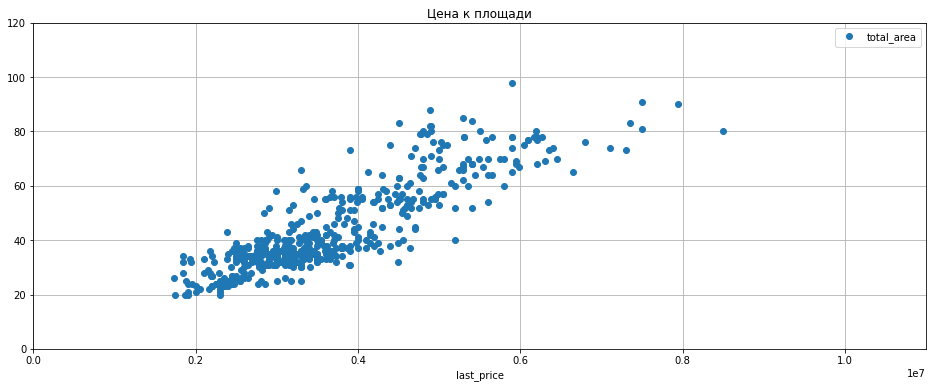

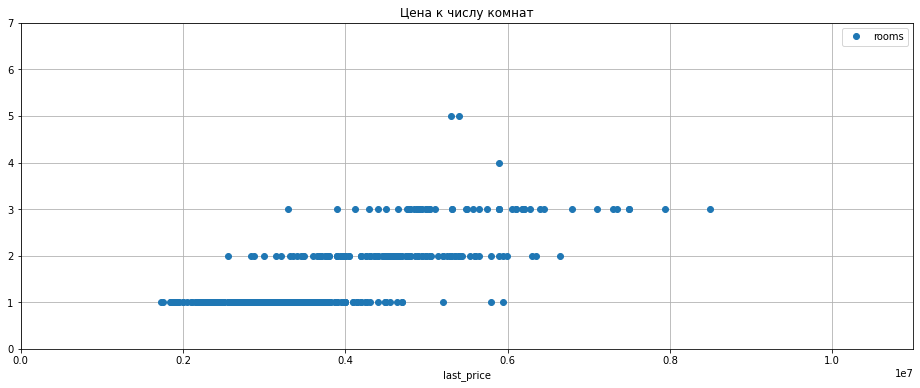

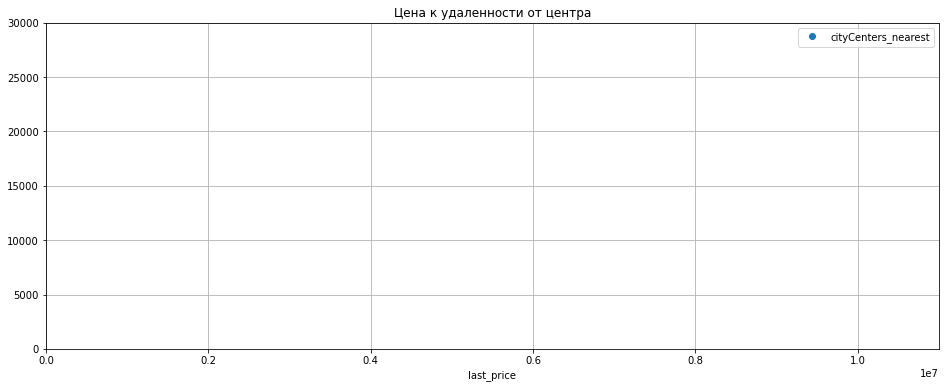

In [152]:
df_mur = df.query('locality_name == "посёлок мурино"')
display('Цена', df_mur['last_price'].describe())
display('Площадь квартир',df_mur['total_area'].describe())
display('Число комнат',df_mur['rooms'].describe())
display('Удаленость от центра',df_mur['cityCenters_nearest'].describe())
df_mur.plot(x='last_price', y='total_area', ylim=(0, 120), xlim=(0, 11000000), style='o', grid=True,  figsize=(16, 6))
plt.title('Цена к площади')
df_mur.plot(x='last_price', y='rooms', ylim=(0, 7), xlim=(0, 11000000), style='o', grid=True,  figsize=(16, 6))
plt.title('Цена к числу комнат')
df_mur.plot(x='last_price', y='cityCenters_nearest', ylim=(0, 30000), xlim=(0, 11000000), style='o', grid=True,  figsize=(16, 6))
plt.title('Цена к удаленности от центра')

### Рассмотрим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом

**из - за того что у нас в этажах строковые значения диаграмму не построить встроим столбец с цифрами**

In [153]:
def floor(row):
    if row == 'первый':
        return 1
    if row == 'последний':
        return 3
    if row == 'другой':
        return 2
df['floor_flat_int'] = df['floor_flat'].apply(floor)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_week_pub,day_month_pub,day_year_pub,floor_flat,ratio_living_total_area,ratio_kitchent_total_area,floor_flat_int
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,120370,3,3,2019,другой,0.472222,0.231481,2
1,7,3350000,40,2018-12-04,1,2.75,11.0,18.6,1,False,False,False,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый,0.460396,0.272277,1
2,10,5196000,56,2015-08-20,2,2.55,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214,2
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000,2
5,10,2890000,30,2018-09-10,1,2.65,12.0,14.4,5,False,False,False,9.1,0.0,городской посёлок янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,95065,0,9,2018,другой,0.473684,0.299342,2


Text(0.5, 1.0, 'Цена к этажу квартиры без сортировки')

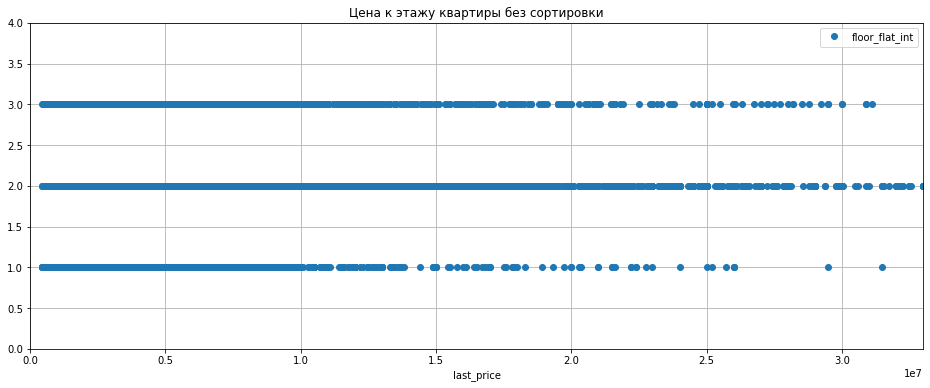

In [154]:
df.plot(x='last_price', y='floor_flat_int', ylim=(0, 4), xlim=(0, 33000000), style='o', grid=True,  figsize=(16, 6))
plt.title('Цена к этажу квартиры без сортировки')

### Попробуем учесть местоположение Спб, удаленность, количество комнат и площадь 

In [155]:
df_floor_flat = df.query('locality_name == "санкт-петербург" and rooms==2 and 45 < total_area < 55 and 12000 < cityCenters_nearest < 14000')

Text(0.5, 1.0, 'Цена к этажу квартиры c сортировкой')

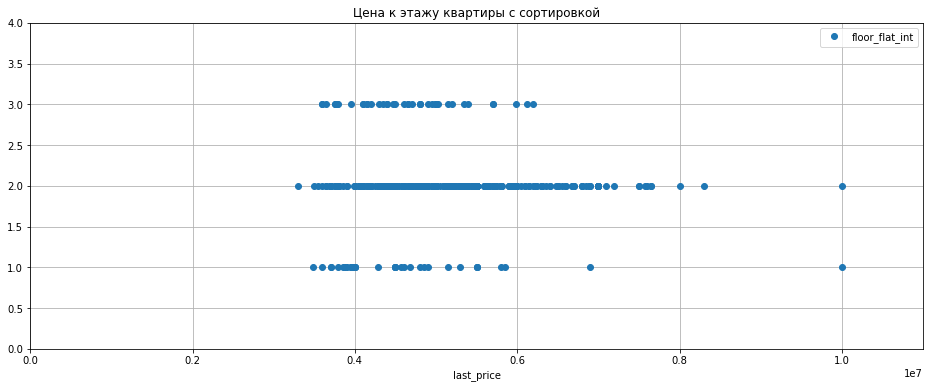

In [156]:
df_floor_flat.plot(x='last_price', y='floor_flat_int', ylim=(0, 4), xlim=(0, 11000000), style='o', grid=True,  figsize=(16, 6))
plt.title('Цена к этажу квартиры c сортировкой')

 ### Изучим зависимость цены от даты размещения: дня недели, месяца и года.
 ### Необходимо выделить из формата даты год и месяц

**Добавляем ячейку с годом и строи диаграмму**

In [157]:
df['first_yars_exposition'] = df['first_day_exposition'].dt.year


Text(0.5, 1.0, 'Зависимость цены от года размещения')

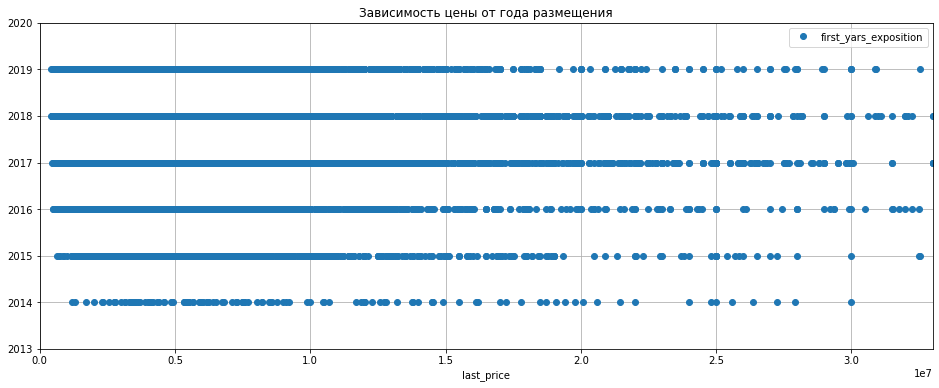

In [158]:
df.plot(x='last_price', y='first_yars_exposition', ylim=(2013, 2020), xlim=(0, 33000000), style='o', grid=True,  figsize=(16, 6))
plt.title('Зависимость цены от года размещения')

**Добавляем ячейку с месяцем и строим диаграмму**

In [159]:
df['first_month_exposition'] = df['first_day_exposition'].dt.month

Text(0.5, 1.0, 'Зависимость цены от месяца размещения')

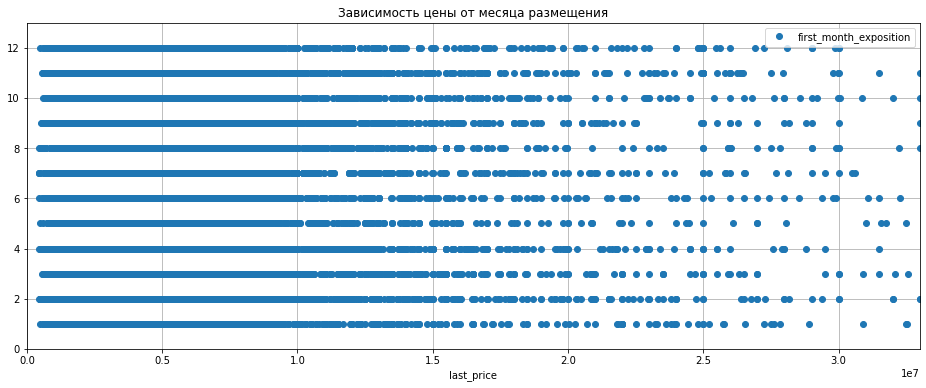

In [160]:
df.plot(x='last_price', y='first_month_exposition', ylim=(0, 13), xlim=(0, 33000000), style='o', grid=True,  figsize=(16, 6))
plt.title('Зависимость цены от месяца размещения')

### Cтроим диаграмму по дням недели
### Понедельник — день под номером 0, а воскресенье — шестой день

In [161]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_week_pub,day_month_pub,day_year_pub,floor_flat,ratio_living_total_area,ratio_kitchent_total_area,floor_flat_int,first_yars_exposition,first_month_exposition
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,120370,3,3,2019,другой,0.472222,0.231481,2,2019,3
1,7,3350000,40,2018-12-04,1,2.75,11.0,18.6,1,False,False,False,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый,0.460396,0.272277,1,2018,12
2,10,5196000,56,2015-08-20,2,2.55,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214,2,2015,8
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000,2,2018,6
5,10,2890000,30,2018-09-10,1,2.65,12.0,14.4,5,False,False,False,9.1,0.0,городской посёлок янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,95065,0,9,2018,другой,0.473684,0.299342,2,2018,9


Text(0.5, 1.0, 'Зависимость цены от дня недели размещения')

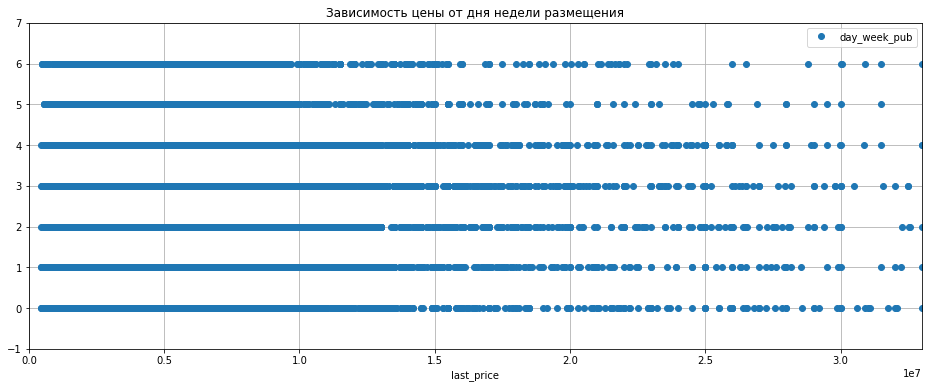

In [162]:
df.plot(x='last_price', y='day_week_pub', ylim=(-1, 7), xlim=(0, 33000000), style='o', grid=True,  figsize=(16, 6))
plt.title('Зависимость цены от дня недели размещения')

### Вывод

### На диаграмме  цена от площади мы видим что общая цена зависит от площади квартиры, но практически  цены за квадратный метр не зависит от площади, там роль играют другие факторы. Количество комнат и  удалённость от центра так же сильной зависимости не показывают.
### Есть небольшая зависимость цены от года размещения, по все видимости долго продающиеся квартиры продаются с дисконтом к рынку.
### Есть  зависимость цены от этажа первые и последние этажи,  продаются дешевле.
### День и месяц размещения практически влияния на цену не оказывает


___________

### Выберем 10 населённых пунктов с наибольшим числом объявлений. 

,first_day_exposition,price_square_meter
locality_name,,
посёлок мурино,520,85878.0
посёлок шушары,439,76829.0
всеволожск,396,65789.0
пушкин,361,99987.0
колпино,337,74722.0
посёлок парголово,327,91642.0
гатчина,305,67924.0
деревня кудрово,299,91860.0
выборг,234,58133.0


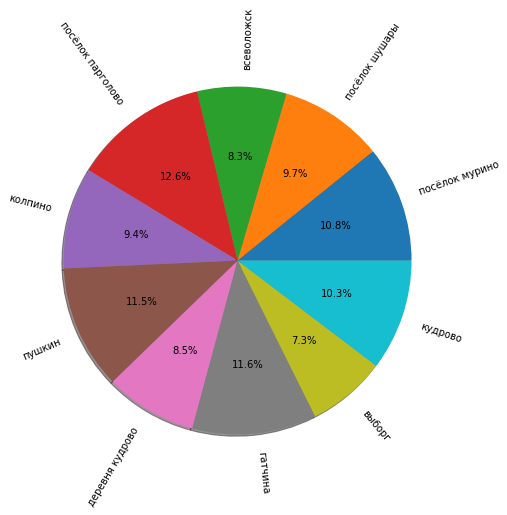

In [163]:
good_data = (df.query('locality_name != "санкт-петербург"')
.groupby(by='locality_name').agg({'first_day_exposition': 'count', 'price_square_meter':'median'})
.sort_values(by = 'first_day_exposition', ascending=False).head(10))
display(good_data)
labels = ['посёлок мурино', 'посёлок шушары', 'всеволожск', 'посёлок парголово', 'колпино', 'пушкин', 'деревня кудрово', 'гатчина', 'выборг', 'кудрово']

plt.pie(good_data['price_square_meter'], labels=labels, autopct='%1.1f%%', shadow=True, rotatelabels=True, radius=2)
plt.show()

**Спб тоже населенный пункт**

In [164]:
df['locality_name'].value_counts().head(10)

санкт-петербург      15282
посёлок мурино         520
посёлок шушары         439
всеволожск             396
пушкин                 361
колпино                337
посёлок парголово      327
гатчина                305
деревня кудрово        299
выборг                 234
Name: locality_name, dtype: int64

### Посчитаем среднюю цену квадратного метра в этих населённых пунктах. 

In [165]:
print('Средняя цена в санкт-петербург-', df.query('locality_name == "санкт-петербург"')['price_square_meter'].median())
print('Средняя цена в посёлок мурино -', df.query('locality_name == "посёлок мурино"')['price_square_meter'].median())
print('Средняя цена в посёлок шушары -', df.query('locality_name == "посёлок шушары"')['price_square_meter'].median())
print('Средняя цена в всеволожск -    ', df.query('locality_name == "всеволожск"')['price_square_meter'].median())
print('Средняя цена в посёлок парголово-', df.query('locality_name == "посёлок парголово"')['price_square_meter'].median())
print('Средняя цена в колпино -       ', df.query('locality_name == "колпино"')['price_square_meter'].median())
print('Средняя цена в пушкин-         ', df.query('locality_name == "пушкин"')['price_square_meter'].median())
print('Средняя цена в деревня кудрово-', df.query('locality_name == "деревня кудрово"')['price_square_meter'].median())
print('Средняя цена в гатчина-        ', df.query('locality_name == "гатчина"')['price_square_meter'].median())
print('Средняя цена в выборг -        ', df.query('locality_name == "выборг"')['price_square_meter'].median())

Средняя цена в санкт-петербург- 104256.0
Средняя цена в посёлок мурино - 85878.0
Средняя цена в посёлок шушары - 76829.0
Средняя цена в всеволожск -     65789.0
Средняя цена в посёлок парголово- 91642.0
Средняя цена в колпино -        74722.0
Средняя цена в пушкин-          99987.0
Средняя цена в деревня кудрово- 91860.0
Средняя цена в гатчина-         67924.0
Средняя цена в выборг -         58133.0


In [166]:
median_price_city = df.groupby(by='locality_name').agg({'price_square_meter': 'median'}).sort_values(by = 'price_square_meter', ascending=False).head(10)
display(median_price_city)

,price_square_meter
locality_name,
посёлок лисий нос,121615.5
санкт-петербург,104256.0
зеленогорск,101666.5
кудрово,100000.0
пушкин,99987.0
сестрорецк,99678.0
посёлок левашово,96997.0
деревня кудрово,91860.0
посёлок парголово,91642.0


### Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья. 

Средняя цена в санкт-петербург- 104 256.0 
Средняя цена в городе Выборг -   58 133.0

###  Какие квартиры в Спб входят в центр.

In [167]:
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_week_pub,day_month_pub,day_year_pub,floor_flat,ratio_living_total_area,ratio_kitchent_total_area,floor_flat_int,first_yars_exposition,first_month_exposition
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,120370,3,3,2019,другой,0.472222,0.231481,2,2019,3
1,7,3350000,40,2018-12-04,1,2.75,11.0,18.6,1,False,False,False,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый,0.460396,0.272277,1,2018,12
2,10,5196000,56,2015-08-20,2,2.55,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214,2,2015,8
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000,2,2018,6
5,10,2890000,30,2018-09-10,1,2.65,12.0,14.4,5,False,False,False,9.1,0.0,городской посёлок янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,95065,0,9,2018,другой,0.473684,0.299342,2,2018,9


**Добавляем столбец с расстоянием от центра в километрах и окгугляем его .round(0) или делением нацело**

In [168]:
df['cityCenters_km_nearest'] = (df['cityCenters_nearest']/1000).round(0)
#df['cityCenters_km_nearest'] = df['cityCenters_nearest']//1000
df_spb_km = df.query('locality_name == "санкт-петербург"')
df_spb_km.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_week_pub,day_month_pub,day_year_pub,floor_flat,ratio_living_total_area,ratio_kitchent_total_area,floor_flat_int,first_yars_exposition,first_month_exposition,cityCenters_km_nearest
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,120370,3,3,2019,другой,0.472222,0.231481,2,2019,3,16.0
2,10,5196000,56,2015-08-20,2,2.55,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214,2,2015,8,14.0
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000,2,2018,6,8.0
7,5,7915000,71,2019-04-18,2,2.75,24.0,68.4,22,False,False,False,18.9,2.0,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,95.0,110544,3,4,2019,другой,0.955307,0.263966,2,2019,4,12.0
9,18,5400000,61,2017-02-26,3,2.50,9.0,43.6,7,False,False,False,6.5,2.0,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524,6,2,2017,другой,0.714754,0.106557,2,2017,2,15.0


### Посчитаем среднюю цену для каждого километра и количество обьявлений на каждом километре  
### выведем два графика , цена за метр и цена за квартиру

,Медианная цена за метр,Медианная цена за квартиру,Кол_во_обьявлений_км
cityCenters_km_nearest,,,
1.0,123584.0,10000000,161
2.0,116929.0,9400000,260
3.0,106916.0,8350000,327
4.0,116981.0,8822000,639
5.0,125796.0,8993202,841
6.0,124394.0,8150000,547
7.0,122115.0,7000000,373
8.0,122564.5,7400000,586
9.0,105714.0,5300000,587


Text(0, 0.5, 'Медианная цена за квартиру')

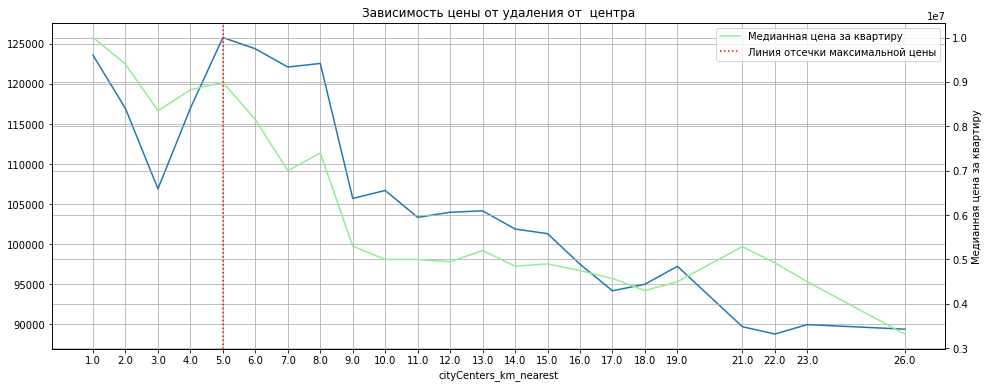

In [186]:
""" Делаем сводную таблицу из расстояния до центра и цен за метр и за квартиру"""

df_spb_price__km = (df_spb_km.groupby('cityCenters_km_nearest').agg({'price_square_meter':'median', 'last_price':'median', 'cityCenters_km_nearest':'count'})
                    .rename(columns = {'cityCenters_km_nearest':'Кол_во_обьявлений_км','price_square_meter':'Медианная цена за метр', 'last_price':'Медианная цена за квартиру' }))
#display(df_spb_price__km.head())

"""Убираем позиции менее чем с 50 обьявлениями"""

df_spb_price__km = df_spb_price__km.query('Кол_во_обьявлений_км > 50')
display(df_spb_price__km.head(25))

"""Формируем переменную с доп графиком цена за метр"""

price_m = df_spb_price__km['Медианная цена за метр'].plot(grid=True, figsize=(16, 6))

"""Основной график куда вставляем дополнительный"""

df_spb_price__km['Медианная цена за квартиру'].plot(grid=True, figsize=(16, 6), ax = price_m.twinx(), color='lightgreen')

"""Линия отсечки максимальной цены"""

plt.axvline(x=5, color='red', linestyle=':')

"""Сетка графика"""
plt.xticks(df_spb_price__km.index.values, df_spb_price__km.index.values)

plt.legend(['Медианная цена за квартиру', 'Линия отсечки максимальной цены'])
plt.title('Зависимость цены от удаления от  центра')
plt.xlabel('Этаж')
plt.ylabel('Медианная цена за квартиру')
plt.ylabel('Медианная цена за квартиру')

### Выделим сегмент квартир в центре. 

In [170]:
df_spb_center = df_spb_km.query('cityCenters_km_nearest < 5')
display(df_spb_center.head())
display(df_spb_center.info())


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_week_pub,day_month_pub,day_year_pub,floor_flat,ratio_living_total_area,ratio_kitchent_total_area,floor_flat_int,first_yars_exposition,first_month_exposition,cityCenters_km_nearest
24,8,6500000,97,2015-10-31,2,2.80,3.0,46.5,1,False,False,False,19.6,0.0,санкт-петербург,20052.0,2336.0,3.0,411.0,3.0,124.0,265.0,66872,5,10,2015,первый,0.478395,0.201646,1,2015,10,2.0
35,6,15500000,149,2017-06-26,5,2.55,5.0,104.0,4,False,False,False,17.0,0.0,санкт-петербург,23670.0,3502.0,0.0,NaN,1.0,779.0,644.0,104026,0,6,2017,другой,0.697987,0.114094,2,2017,6,4.0
61,18,7990000,74,2017-08-24,2,3.00,4.0,43.0,4,False,False,False,20.0,0.0,санкт-петербург,22568.0,4288.0,1.0,363.0,0.0,NaN,609.0,107972,3,8,2017,последний,0.581081,0.270270,3,2017,8,4.0
99,32,9600000,90,2017-09-26,4,2.55,5.0,67.0,2,False,False,False,8.0,0.0,санкт-петербург,23277.0,2818.0,0.0,NaN,0.0,NaN,104.0,106666,1,9,2017,другой,0.744444,0.088889,2,2017,9,3.0
121,20,33000000,180,2017-02-17,3,2.90,9.0,86.0,8,False,False,False,24.0,4.0,санкт-петербург,25689.0,4264.0,1.0,633.0,0.0,NaN,144.0,183333,4,2,2017,другой,0.477778,0.133333,2,2017,2,4.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1402 entries, 24 to 23694
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               1402 non-null   int64         
 1   last_price                 1402 non-null   int32         
 2   total_area                 1402 non-null   int32         
 3   first_day_exposition       1402 non-null   datetime64[ns]
 4   rooms                      1402 non-null   int64         
 5   ceiling_height             1402 non-null   float64       
 6   floors_total               1402 non-null   float64       
 7   living_area                1402 non-null   float64       
 8   floor                      1402 non-null   int64         
 9   is_apartment               1402 non-null   bool          
 10  studio                     1402 non-null   bool          
 11  open_plan                  1402 non-null   bool          
 12  kitc

None

**Анализируем квартиры в центре следующие параметры: площадь, цена, число комнат, высота потолков.**
**Выделим эти категории в отдельную таблицу и построим: матрицу диаграмм рассеяния**
**и посмотрим корреляцию**


                   rooms  last_price  ceiling_height  total_area
rooms           1.000000    0.475389        0.148076    0.797816
last_price      0.475389    1.000000        0.192300    0.699864
ceiling_height  0.148076    0.192300        1.000000    0.212428
total_area      0.797816    0.699864        0.212428    1.000000


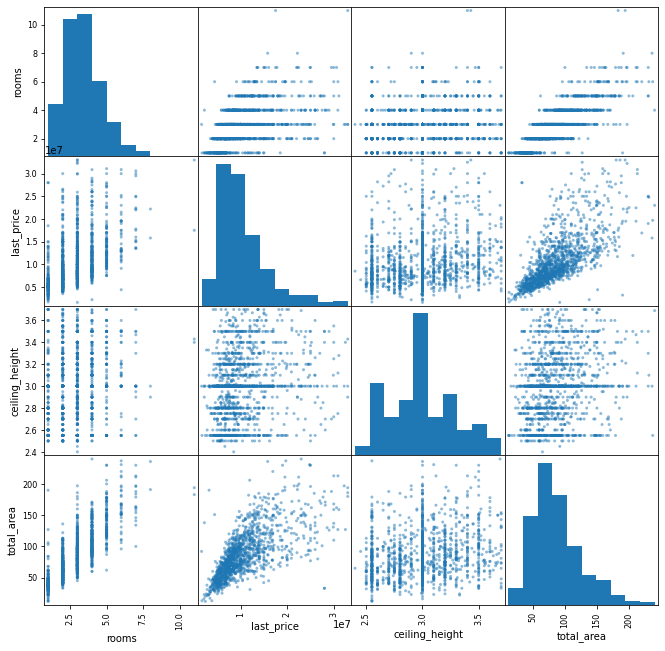

In [171]:
df_spb_center_rooms = df_spb_center.loc[:,['rooms', 'last_price','ceiling_height','total_area']]
#display(df_spb_center_rooms.head())
print(df_spb_center_rooms.corr())
pd.plotting.scatter_matrix(df_spb_center_rooms, figsize=(11, 11))
plt.show()

### Факторы, которые влияют на стоимость квартиры в центре (число комнат, этаж, удалённость от центра, дата размещения объявления, площадь квартиры ). В сравнении с общим количеством квартир

In [172]:
df_spb_center_last_price = df_spb_center.loc[:,['last_price','rooms', 'floor','cityCenters_km_nearest', 'first_day_exposition','total_area', 'ceiling_height']]
print('1. Диаграмма центра')
print('Корреляция')
print('Чем ближе коэффициент корреляции Пирсона к крайним значениям: 1 или -1, тем сильнее взаимозависимость. Если значение близко к нулю,  значит связь слабая, либо отсутствует вовсе здесь у нас корреляция есть, но не очень большая')
df_last_price = df.loc[:,['last_price','rooms', 'floor','cityCenters_km_nearest', 'first_day_exposition', 'total_area', 'ceiling_height']]      
display(df_spb_center_last_price.corr())
print('2. Диаграмма всего списка')        
print('Корреляция')
display(df_last_price.corr())        

1. Диаграмма центра
Корреляция
Чем ближе коэффициент корреляции Пирсона к крайним значениям: 1 или -1, тем сильнее взаимозависимость. Если значение близко к нулю,  значит связь слабая, либо отсутствует вовсе здесь у нас корреляция есть, но не очень большая


,last_price,rooms,floor,cityCenters_km_nearest,total_area,ceiling_height
last_price,1.000000,0.475389,0.180379,-0.094470,0.699864,0.192300
rooms,0.475389,1.000000,0.029739,-0.071900,0.797816,0.148076
floor,0.180379,0.029739,1.000000,0.172222,0.119655,-0.100297
cityCenters_km_nearest,-0.094470,-0.071900,0.172222,1.000000,-0.056396,-0.098732
total_area,0.699864,0.797816,0.119655,-0.056396,1.000000,0.212428
ceiling_height,0.192300,0.148076,-0.100297,-0.098732,0.212428,1.000000


2. Диаграмма всего списка
Корреляция


,last_price,rooms,floor,cityCenters_km_nearest,total_area,ceiling_height
last_price,1.000000,0.510385,0.079105,-0.344194,0.791371,0.436046
rooms,0.510385,1.000000,-0.152460,-0.162314,0.796752,0.191851
floor,0.079105,-0.152460,1.000000,0.001309,-0.022212,0.005484
cityCenters_km_nearest,-0.344194,-0.162314,0.001309,1.000000,-0.222151,-0.294239
total_area,0.791371,0.796752,-0.022212,-0.222151,1.000000,0.384828
ceiling_height,0.436046,0.191851,0.005484,-0.294239,0.384828,1.000000


1. Диаграмма центра


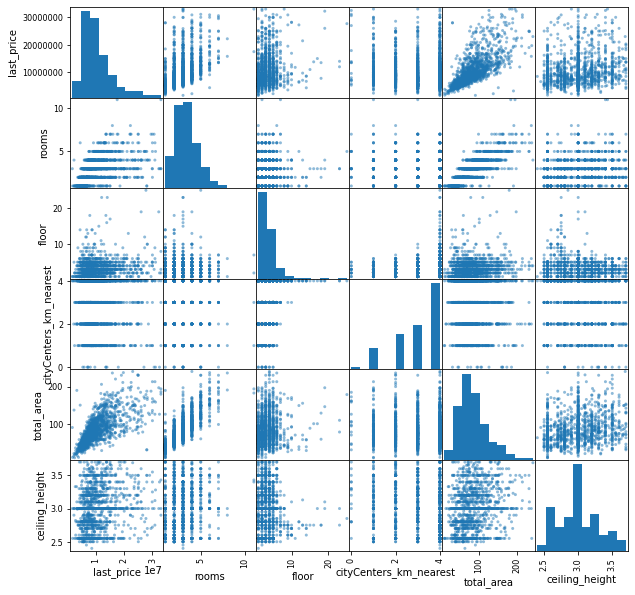

In [173]:
print('1. Диаграмма центра')
pd.plotting.scatter_matrix(df_spb_center_last_price, figsize=(10, 10))
plt.show()

2. Диаграмма всего списка


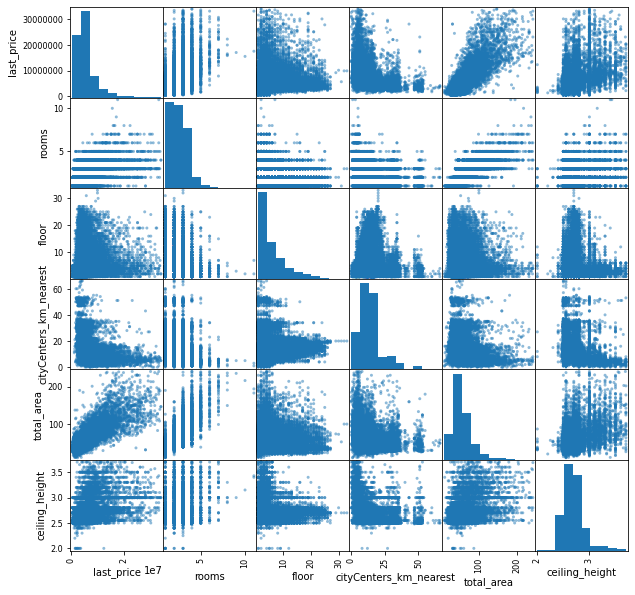

In [174]:
print('2. Диаграмма всего списка')
pd.plotting.scatter_matrix(df_last_price, figsize=(10, 10));
plt.show()

### Сделаем выводы

**- Медианная стоимость квартир в Санкт Петербурге выше чем в области, видно что чем дальше от центра Петербурга тем ниже стоимость квартир**  
**- Для центра Спб характерна более высокие потолки чем на окраинах**  
**- Для центра Спб характерна большая высота потолков при меньшей этажности**  
**- В центре предложение квартир с кличеством комнат больше 4 минимально**  
**- И в центре и на окраинах чем выше этаж тем меньше цена**  
**- На окраинах больше предложений с высотой потолко с 2.5 да 3.0 м - меньшей чем в центре**  



### Шаг 5. Общий вывод

**- Типичная квартира для Спб 2-3 комнатная с высотой потолкав 2.5-3 метра расположенная в 11 и до 17 км  от центра что скорее всего связано с активным стоительством на окраинах города**  
**- Центр:**  
- Медианная стоимость квартир в Санкт Петербурге выше чем в области, видно что чем дальше от центра Петербурга тем ниже стоимость квартир
- Для центра Спб характерна более высокие потолки чем на окраинах
- Для центра Спб характерна большая высота потолков при меньшей этажности
- В центре предложение квартир с кличеством комнат больше 4 минимально
- И в центре и на окраинах чем выше этаж тем меньше цена
- На окраинах больше предложений с высотой потолков с 2.5 да 3.0 м - меньшей чем в центре  
  
**- Общие тенденции оказывающие влияние на цену:**  
  
- Наибольшую зависимость на цену оказывает площадь квартиры
- Так же большое влияние на цену оказывает удаление от центра Спб, чем дальше от центра Петербурга тем ниже стоимость квартир
- Как правило чем больше количество комнат тем выше цена, но тут скорее влияет общея площадь ( у квартир с большим количеством комнат она выше)
- Стоимость квартир на первом и последнем этаже ниже чем на прочих
- Чем выше потолки в квартире тем выше цена
